# Predicting Churn in Telco Customers

![](/Users/pavansingh/Library/CloudStorage/GoogleDrive-pavansingho23@gmail.com/My Drive/Portfolio/Projects/Python/CustomerChurnPrediction/churn.jpg)


# Project Description

This project involves analysing and predicting customer churn. Churning, or customer attrition, is the loss of a customer. Customers who churn result in revenue loss, as generally it is considered less expensive for a company to keep an existing customer than to convert a new customer. Being able to accurately predict if a customer will churn allows a company to decide if they would like to enact measures to keep the customer, such as offering discounted bundles or incentives to stay. Amongst that, there are other ways in which companies which know who and when customers are leaving, such as engaging with customers, educating customer, as well as other incentives as mentioned. Provision of better service is also an option, but this all relies on a company's ability to accurately predict churn in customers. Hence, the importance of such tasks.

For this project we seek to predict churn in Telco Customers using a dataset hosted on Kaggle. The project involves a lengthy exploration of the data set to pick up and/or reveal any relationships between our target variable and the other variables in the dat set. We then seek to begin modelling, with the goal of finding a model that can most accurately classify if a customer has churned. having said this, we specifcally are looking for a model that is suitably accurate across the board, correctly classifying the target variable in both directions (determined via recall, precision, and f1 score) and has a high recall.

Our analysis/modelling is split into three sections.

- the first section: using only categorical variable shaving made dummy vairbales bins for the continous variables

- the second section: uses PCA to see if using dimension reduction improves the performance of our models

- the third section: makes use of all the categorical and continous variables together

Specifically the models that we shall be using and testing are: K-nearest neighbours, logistic regression, ridge classification, LASSO classification, decision tree classification, random forest classification, support vector classification and gradient boost classification. Parameters and features may be transformed and selected using GridSearchCV and PCA.
<p>

***

## Project Aims & Goals

The main goal of this project is to determine which customers are at risk for leaving, allowing the company the option of taking preventative measures to keep the customer. This shall be achieved by evaluating and discovering which features determine if a customer will leave or stay. We will also be creating a binary classification model using supervised machine learning which attains appropriate (or high) recall metrics. Moreover, we shall be tuning the highest-performing model’s hyperparameters to increase its power.

***
# Data Description

Our data set is a Teleco Customer Churn data set from [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn). The Dataframe shape: 7043 rows, 21 columns. Each row represents a customer, each column contains customer’s attributes.
Our data set is made up of 17 categorical variables including our target variable. Four deal with demographics: Gender, senior citizen, partner, and dependents. Five are possible subscription types or add-ons: Phone service, multiple lines, Internet service, streaming TV, and streaming movies. Three variables detail billing: Contract, payment method, and paperless billing. Four variables deal with security and support: Online security, online backup,
device protection, and tech support. Our outcome of interest is `churn`, a binary variable - customers who left within the last month.

We also have 3 continuous variables in our data set.
- Monthly charges: how much a customer paid each month
- Tenure: how long a customer stayed or has been with the company
- Total charges: the total amount a customer spent or has spent during their tenure


***
# Setup

We begin by importing necessary libraries. We also print out the version numbers of all the libraries we will be using in this project, as this helps ensure we are using the correct libraries but also allows the work to be reproducible.

In [ ]:
# import modules
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

current_state = np.random.get_state()
np.random.set_state(current_state)
import matplotlib.patches as mpatches

# Show matplotlib plots inline
%matplotlib inline

#Versions
print("Versions of modules \n")
print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(np.__version__))
print('Pandas: {}'.format(pd.__version__))
print('Seaborn: {}'.format(sns.__version__))
print('Scipy: {}'.format(scipy.__version__))

Versions of modules 

Python: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
Numpy: 1.21.6
Pandas: 1.3.5
Seaborn: 0.11.2
Scipy: 1.7.3


In [ ]:
# Dont Want to See Warnings
import warnings
warnings.filterwarnings("ignore")

Now let's load the data into our environment. We also view it below.

In [ ]:
# Load Data
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print("Telco Customers Dataset has {} samples with {} features each.".format(*data.shape))

Telco Customers Dataset has 7043 samples with 21 features each.


In [ ]:
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

***
# Data Exploration

Here we shall begin having a look at our data through a serries of different plots and code to understand how each feature is related to the others, particularly our target variable `churn`. This section features a lot of graphic visualisations for the data. Looking at different plots in differetn ways to express a different narrative. We analyse our categorical and numerical variables seperately, but do offer scope of using both categorical and numerical data to visualsaie a relationship between the two. 

Specifcally, we start by simply understanding the structure of our data and then by checking for missing data. We then move on to a summary of the realtionship between variables using a correaltion heat map. Following this we begin exploring our categorical variables. Then our numerical variables. After this we provide summaries for various sectors that our variables describe such as "billing", "demographics" and "types of service". 

We end off this section by breifly looking at some more specific exploration of the data and relationships between two or more variables with our response/target variable, `Churn`.

 Let's just print some quick information about our data.

In [ ]:
# Shape
print("Shape: ", data.shape)

# Columns
print("Columns: \n", data.columns)

# Data Types
print("Data Types: \n", data.dtypes)

Shape:  (7043, 21)
Columns: 
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Data Types: 
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn          

Initial exploration tells us the following: our dataset has 7043 rows and 21 columns. Of the columns, 3 are numerical fields (`SeniorCitizen`, `tenure`, and `monthly charges`). The other columns are categorical variables.

The `senior citizen` column is a binary classifier with two possible inputs: 0 for 'not a senior citizen' and 1 for 'a senior citizen'

Of the original features, `customer ID` does not do much for us, so we delete it.

In [ ]:
# drop customer ID
data = data.drop('customerID',axis=1)

We also identify that SeniorCitizen, which tells us whether the customer is a senior citizen or not (1, 0), is recorded as a numeric variable. Let's change that to categorical. 

In [ ]:
# Change Data Type
data['SeniorCitizen'] = pd.Categorical(data['SeniorCitizen']) #Changing from int to categorical

In [ ]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

We have 16 categorical variables:

* Four variables deal with the person and their home life (gender, SeniorCitizen, Partner, Dependents)
* Five variables are subscription types or add-ons (PhoneService, MultipleLines, InternetService, StreamingTV, StreamingMovies)
* Three variables deal with billing (Contract, PaperlessBilling, PaymentMethod)
* The remaining four variables have to do with security and support (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport)

Exploring them at more of a face value, we find the following:

* Six binary features
* Nine features with three unique values
* One feature with four unique values 

## Check for Missing Data

We shall now  be checking for missing data and possible imputing (if needed).

Text(0.5, 1.0, 'Heat Map of Missing Values')

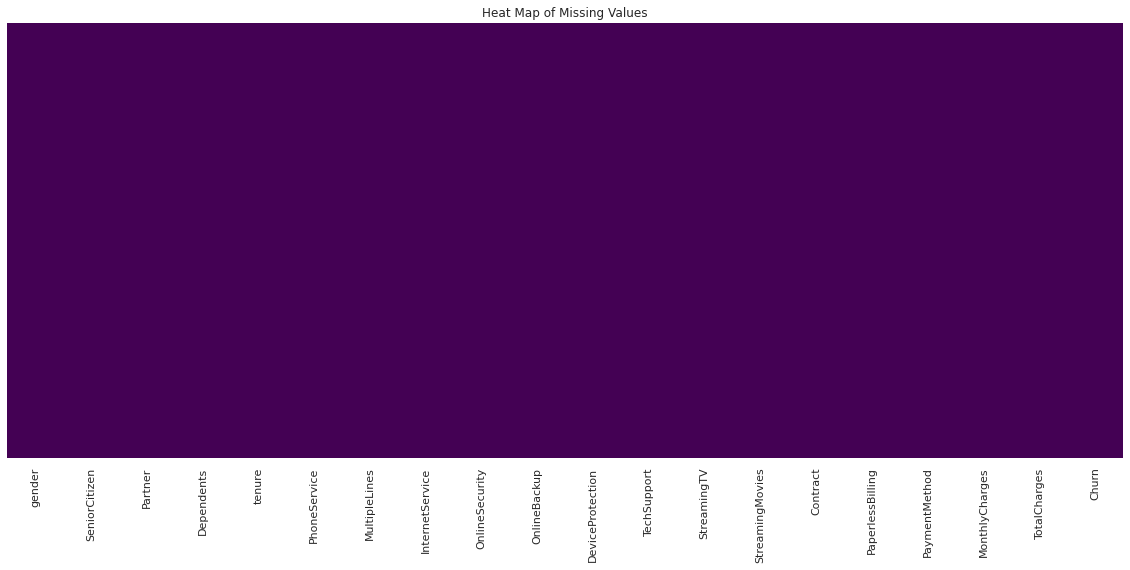

In [ ]:
# Make a heatmap of missing data values
sns.set(rc={'figure.figsize':(20,8)})
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis').set_title('Heat Map of Missing Values')

In [ ]:
# Double check
print("Are there any missing data: ", data.isnull().values.any())

Are there any missing data:  False


Our initial analysis suggests that there are no null values. However, later on during the analysis we do discover that there are several blank entries. All of them are in the `TotalCharges` column and are assumed to do with someone who never paid the company anything. As such, we'll be dropping them from the dataset. We could also impute the data with '0' in the appropriate field. Since we are trying here to focus on predicting customer churn, we will consider customers who never paid as not really customers, and ignore their behavior.

In [ ]:
data['TotalCharges'] = data['TotalCharges'].replace(" ", 0).astype('float32')
data = data[data.TotalCharges != 0]

We have no missing values in the entire dataset. Having done such, we show the updated dimensions of our data below. We can proceed with exploring our data.

In [ ]:
# Shape
print("Shape: ", data.shape)

Shape:  (7032, 20)


## Correlation Heat Map

Let's look at a correlation heat map with all our variables. 

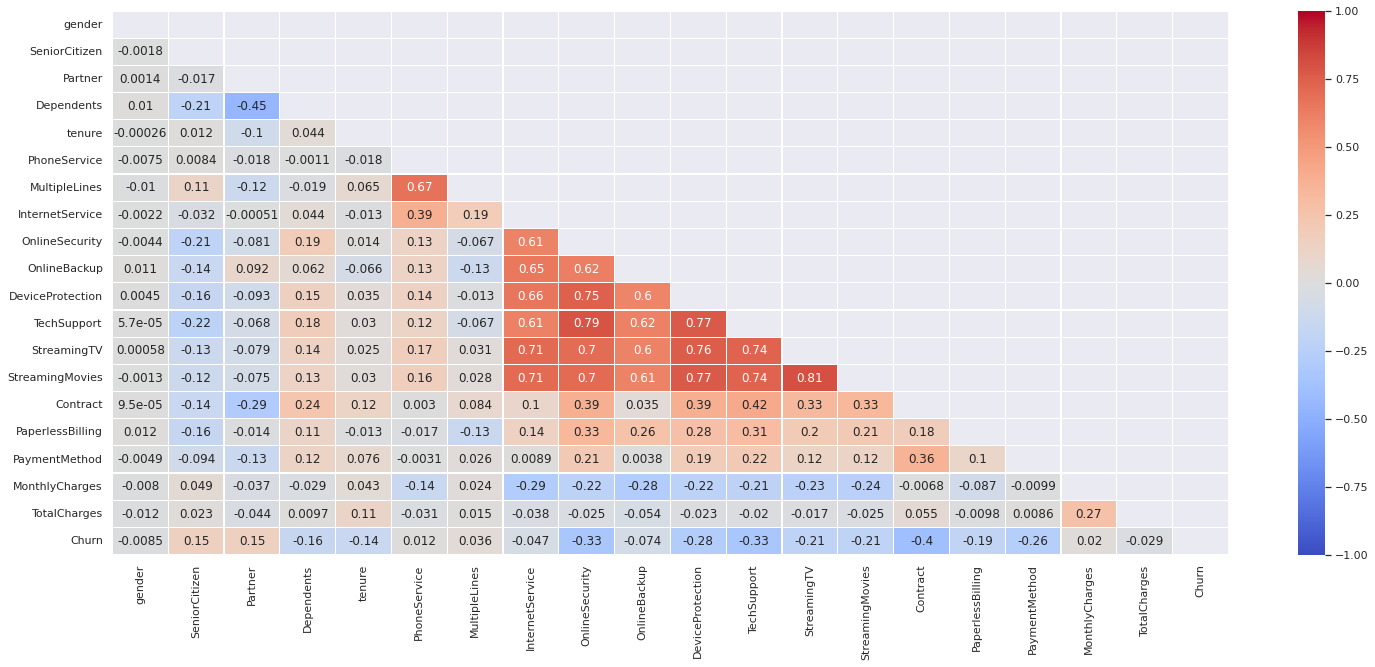

In [ ]:
plt.figure(figsize=(25, 10))

corr = data.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

## Categorial Variable Analysis

Let's dive deeper into exploring our data, specifically the categorical variables. We have many of these in our data. We shall first turn towards looking at our target variable and draw some visualisation with its distribution. Our Target variable is `churn`.

In [ ]:
# Value counts for our target category
print("Value Counts for Churn: \n", data['Churn'].value_counts())

Value Counts for Churn: 
 No     5163
Yes    1869
Name: Churn, dtype: int64


Let's visualise this making use of a pie plot and bar chart. They show the same data in different ways. Note, that we percieve length (size) better than round objects or area. 

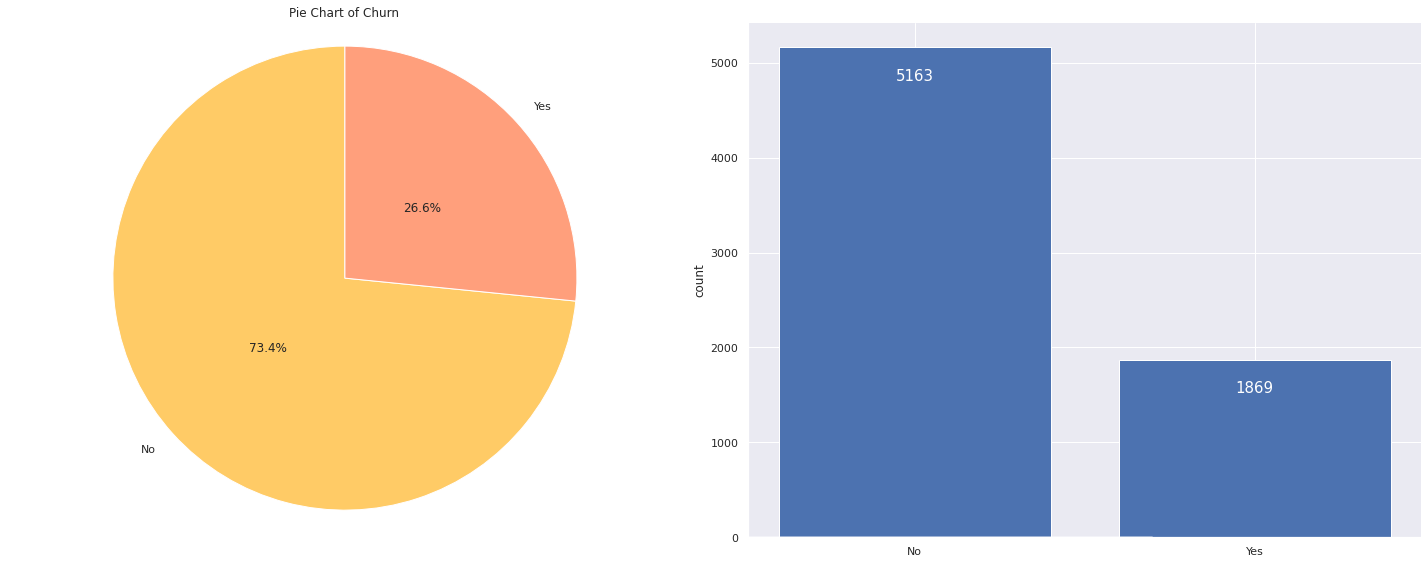

In [ ]:
# Plot of Customer Churns
plt.rcParams["figure.figsize"] = (20,8)
churn = data['Churn'].value_counts()
c_scheme = ['#FFCB66', '#FF9F7C', '#FF809C', '#D872B7', '#9070C2', '#467BD3', '#0084D3', '#0089C0', '#00866B']

# Pie Chart
labels = ['No', 'Yes']
sizes = churn

# Plot
fig1, (ax1,ax2) = plt.subplots(1,2)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.45, shadow=False, colors=c_scheme)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
ax1.set_title('Pie Chart of Churn')


# Bar Plot
feature_data = data['Churn'].value_counts()
plt.bar(feature_data.index,feature_data)
ax2.set_ylabel('count')
for i in feature_data.index:
    ax2.text(i,feature_data[i]-300,feature_data[i],va='center',ha='center',
            fontsize=15,color='white')
for s in ['top', 'right']:
    ax2.spines[s].set_visible(False)
plt.tight_layout()
plt.show()

Around 73% of the customers i nour data did not churn (they stayed). This represents 5 163 individuals who stayed. 

Let's investigate the role of gender with customers who churn and stayed.

### Gender

We plot a pie chart for customers who churned and show the respective sex. We also simply show the count of each sex in our data.

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=data['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=data['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.20, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.80, y=0.5, font_size=20, showarrow=False)])
fig.show()

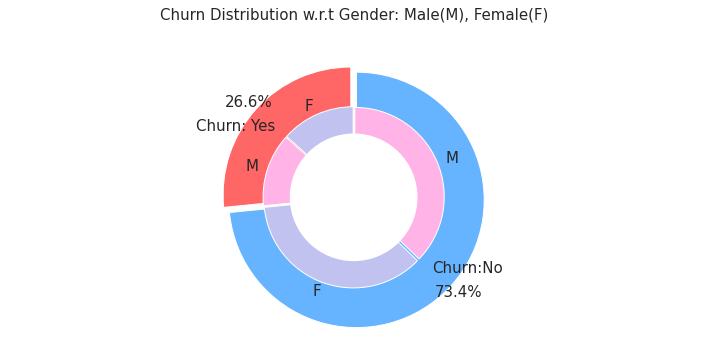

In [ ]:
plt.figure(figsize=(10, 5))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

There is negligible difference in customer percentage/count who chnaged the service provider (churn). Both genders behaved in similar fashion when it comes to migrating to another service provider/firm (churn).

### Contract Term

Let's investivate the contract distribution with our customers. The `contract term` of the customer is a categorical variable where a customer can either have a Month-to-month, One year, Two year contract (3 levels/categories). 

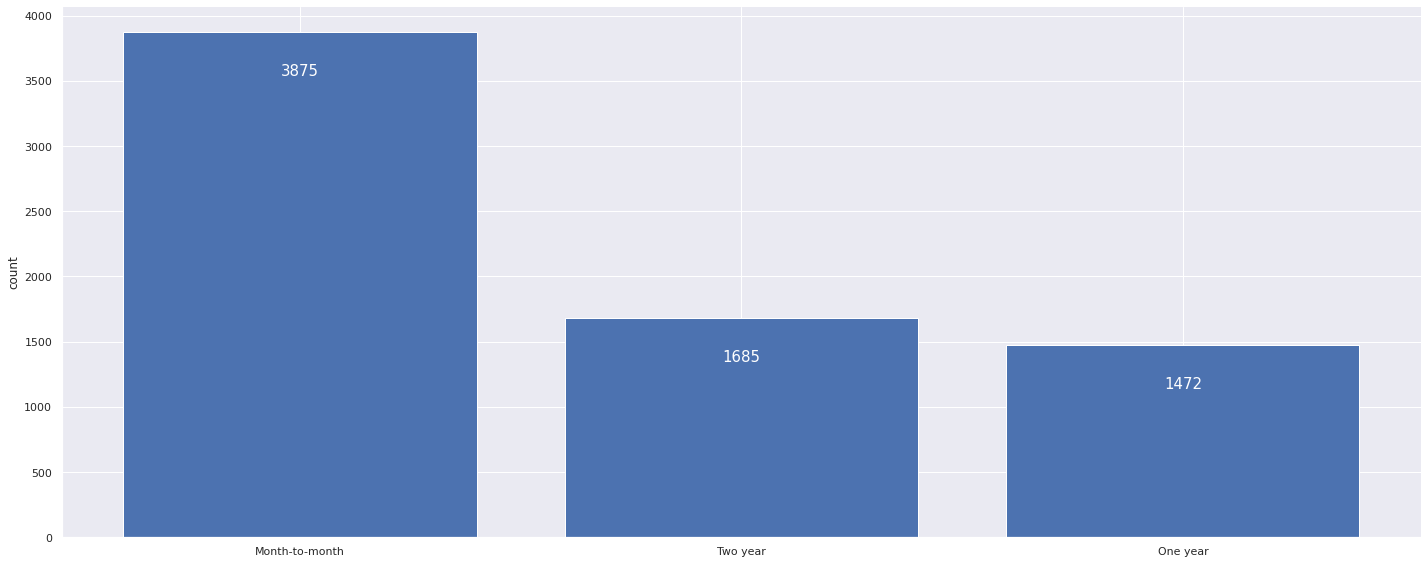

In [ ]:
# relationship with Churn
import plotly.express as px
fig = px.histogram(data, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=1000, height=500, bargap=0.1)
fig.show()

# Bar Plot of distribution
fig1, ax = plt.subplots()
feature_data = data['Contract'].value_counts()
plt.bar(feature_data.index,feature_data)
ax.set_ylabel('count')
for i in feature_data.index:
    ax.text(i,feature_data[i]-300,feature_data[i],va='center',ha='center',
            fontsize=15,color='white')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
plt.tight_layout()
plt.show()

About 75% of customer with Month-to-Month Contract opted (1655) to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract. The bulk of our contracts with customers are month to month. Followed by two year then one year contracts. 

Two year contracts have the lowest proportion of people who opted to move out. 

### Payment Method

This looks at the customer’s payment method, which can either be Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic). 

We start by investigating the distribution of the variable. We then shall check the relationship with target `Churn` variable. 

In [ ]:
labels = data['PaymentMethod'].unique()
values = data['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

Majoirty of of our customers use a electronic check (33.6%). The least common payment method is credit card. However, all the classes are very similarly balanced. 

In [ ]:
fig = px.histogram(data, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=1000, height=500, bargap=0.1)
fig.show()

Major customers who moved out were having Electronic Check as Payment Method.
Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

In [ ]:
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

### Internet Service Provider 

This variable reflects a customer’s internet service provider (DSL, Fiber optic, No). 

In [ ]:
# distribution of Internet Service
fig = px.histogram(data, x="Churn", color="InternetService", barmode="group", title="<b>Internet Service</b>")
fig.update_layout(width=1000, height=500, bargap=0.1)
fig.show()

A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.
Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service

### Demographics 

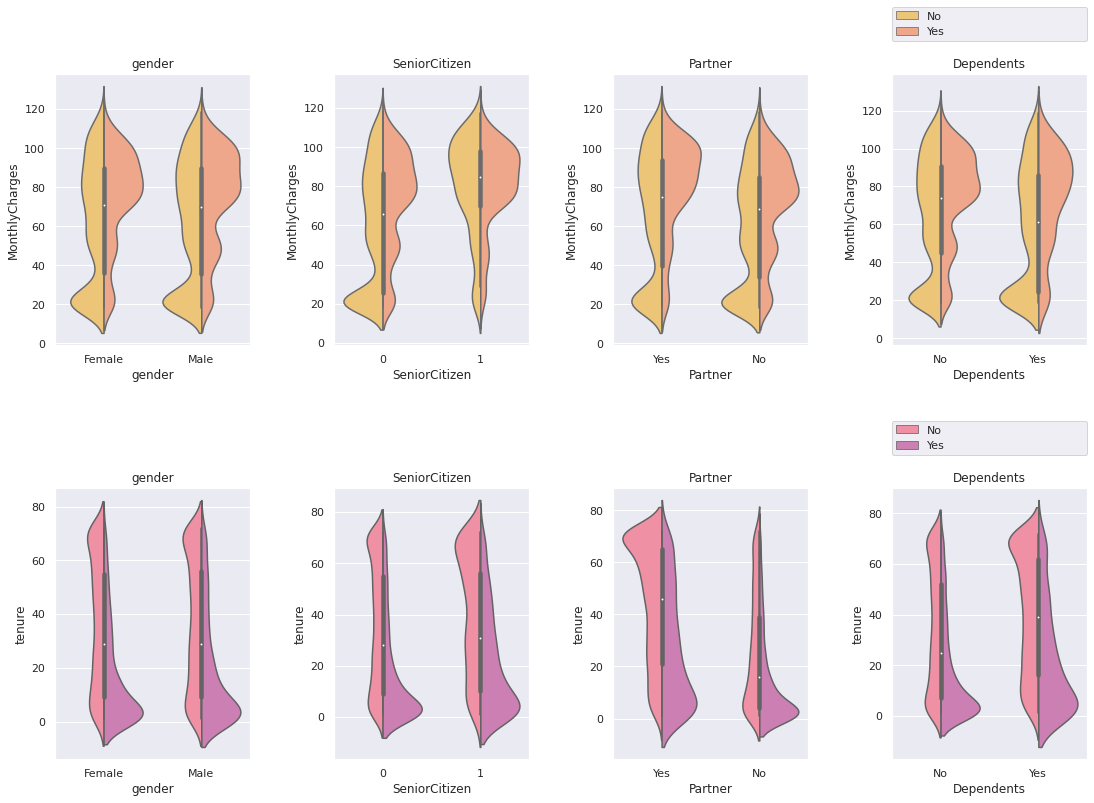

In [ ]:
interest = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']


fig, axis = plt.subplots(len(interest)//2, len(interest), figsize=(16,12))

for i in range (0, 4):
    axis[0][i-1].set_title("{}".format(interest[i-1]))
    axis[1][i-1].set_title("{}".format(interest[i-1]))
    ax = sns.violinplot(x=interest[i-1], y="MonthlyCharges", hue="Churn",
                       split=True, palette=c_scheme, data=data, height=4.2, aspect=1.4, ax=axis[0][i-1])
    ax.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else ax.legend_.remove()
    
    ax = sns.violinplot(x=interest[i-1], y="tenure", hue="Churn",
                       split=True, palette=c_scheme[2:], data=data, height=4.2, aspect=1.4, ax=axis[1][i-1])
    ax.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else ax.legend_.remove()

plt.tight_layout(pad=3)

Gender does not seem to play a role in churn. Senior citizens with high monthly costs are associated with higher churn. Not having a partner seems to also slightly impact churn when related to monthly costs. That is; partnered people seem to either churn early or stay a long time.  Dependents looks to play a slight role in churn. 

In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(data, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=1000, height=500, bargap=0.1)
fig.show()

Customers without dependents are more likely to churn

In [ ]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(data, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=1000, height=500, bargap=0.1)
fig.show()

Customers that doesn't have partners are more likely to churn

In [ ]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(data, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=1000, height=500, bargap=0.1)
fig.show()

It can be observed that the fraction of senior citizen is very less.
Most of the senior citizens churn.

### Type of Service

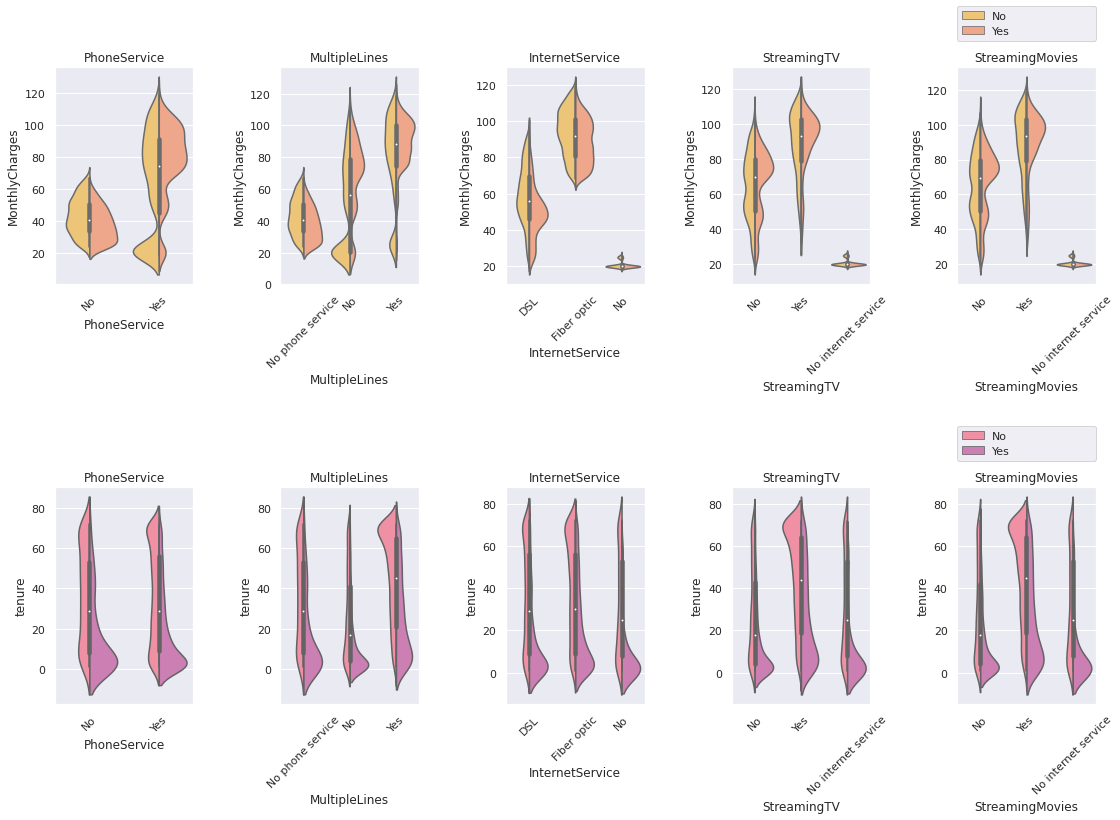

In [ ]:
interest = ['PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies']


fig, axis = plt.subplots(len(interest)//2, len(interest), figsize=(16,12))

for i in range (0, len(interest)):
    axis[0][i-1].set_title("{}".format(interest[i-1]))
    axis[1][i-1].set_title("{}".format(interest[i-1]))
    ax = sns.violinplot(x=interest[i-1], y="MonthlyCharges", hue="Churn",
                       split=True, palette=c_scheme, data=data, height=4.2, aspect=1.4, ax=axis[0][i-1])
    ax.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else ax.legend_.remove()
    plt.setp(ax.get_xticklabels(), rotation=45)
    
    ax = sns.violinplot(x=interest[i-1], y="tenure", hue="Churn",
                       split=True, palette=c_scheme[2:], data=data, height=4.2, aspect=1.4, ax=axis[1][i-1])
    ax.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else ax.legend_.remove()
    plt.setp(ax.get_xticklabels(), rotation=45)

plt.tight_layout(pad=2)

Again we can see that customers less than 20 months are at higher risk for churn, regardless of other status as senior citizen, parent, gender, or partner status. 

Customers with multiple phone lines are at slightly higher risk for churn

Streaming service is not predictive of churn.

Features associated with higher monthly cost are associated with churn.

In [ ]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(data, x="Churn", color="PhoneService", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=1000, height=500, bargap=0.1)
fig.show()

### Billing 

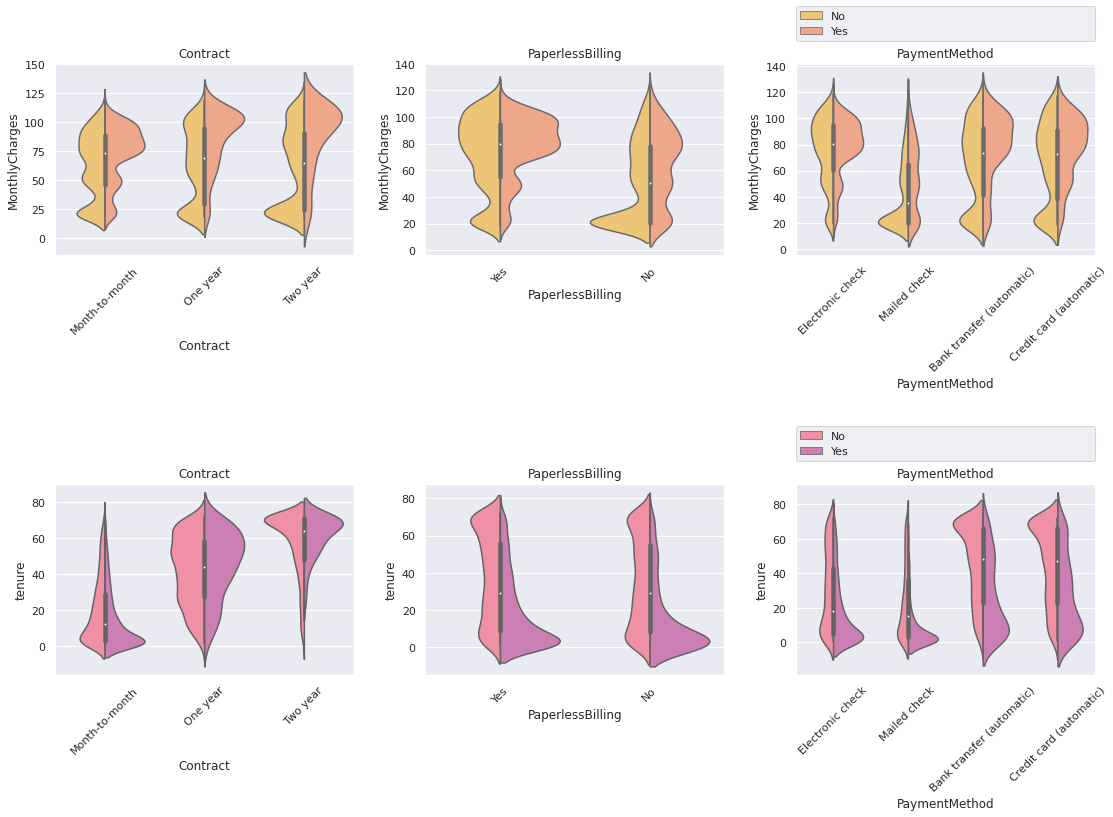

In [ ]:
interest = ['Contract','PaperlessBilling','PaymentMethod']


fig, axis = plt.subplots(2, len(interest), figsize=(16,12))

for i in range (0, len(interest)):
    axis[0][i-1].set_title("{}".format(interest[i-1]))
    axis[1][i-1].set_title("{}".format(interest[i-1]))
    ax = sns.violinplot(x=interest[i-1], y="MonthlyCharges", hue="Churn",
                       split=True, palette=c_scheme, data=data, height=4.2, aspect=1.4, ax=axis[0][i-1])
    ax.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else ax.legend_.remove()
    plt.setp(ax.get_xticklabels(), rotation=45)
    
    ax = sns.violinplot(x=interest[i-1], y="tenure", hue="Churn",
                       split=True, palette=c_scheme[2:], data=data, height=4.2, aspect=1.4, ax=axis[1][i-1])
    ax.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else ax.legend_.remove()
    plt.setp(ax.get_xticklabels(), rotation=45)

plt.tight_layout(pad=2)

High monthly charges influence churn. Month-to-month contracting is associated with earlier churn, whereas 2-year contracts average at around 70 month tenure. 

Customers with two year contracts
average at around 72 months of tenure (6 years).

Those without paperless billing are less likely to churn.

Customers with security features have higher tenure, but also higher monthly costs.

In [ ]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(data, x="Churn", color="PaperlessBilling",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=1000, height=500, bargap=0.1)
fig.show()

### Security and Tech Support


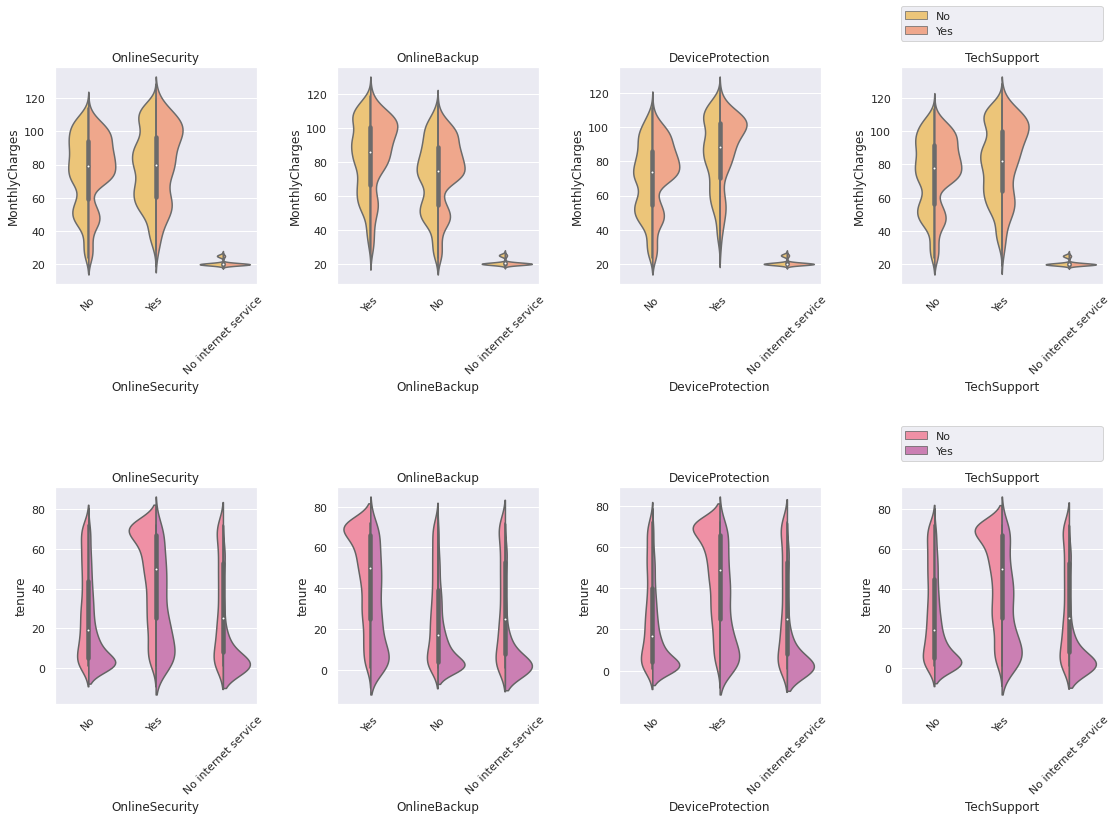

In [ ]:
interest = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']


fig, axis = plt.subplots(len(interest)//2, len(interest), figsize=(16,12))

for i in range (0, len(interest)):
    axis[0][i-1].set_title("{}".format(interest[i-1]))
    axis[1][i-1].set_title("{}".format(interest[i-1]))
    ax = sns.violinplot(x=interest[i-1], y="MonthlyCharges", hue="Churn",
                       split=True, palette=c_scheme, data=data, height=4.2, aspect=1.4, ax=axis[0][i-1])
    ax.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else ax.legend_.remove()
    plt.setp(ax.get_xticklabels(), rotation=45)
    
    ax = sns.violinplot(x=interest[i-1], y="tenure", hue="Churn",
                       split=True, palette=c_scheme[2:], data=data, height=4.2, aspect=1.4, ax=axis[1][i-1])
    ax.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else ax.legend_.remove()
    plt.setp(ax.get_xticklabels(), rotation=45)

plt.tight_layout(pad=2)

In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(data, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=1000, height=500, bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(data, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=1000, height=500, bargap=0.1)
fig.show()

## Numerical Variable Analysis

Before we analyse the univariate distributions, lets see how the distriubtions look with the target variable, `Churn`.

### Monthly Charges

The amount charged to the customer monthly.

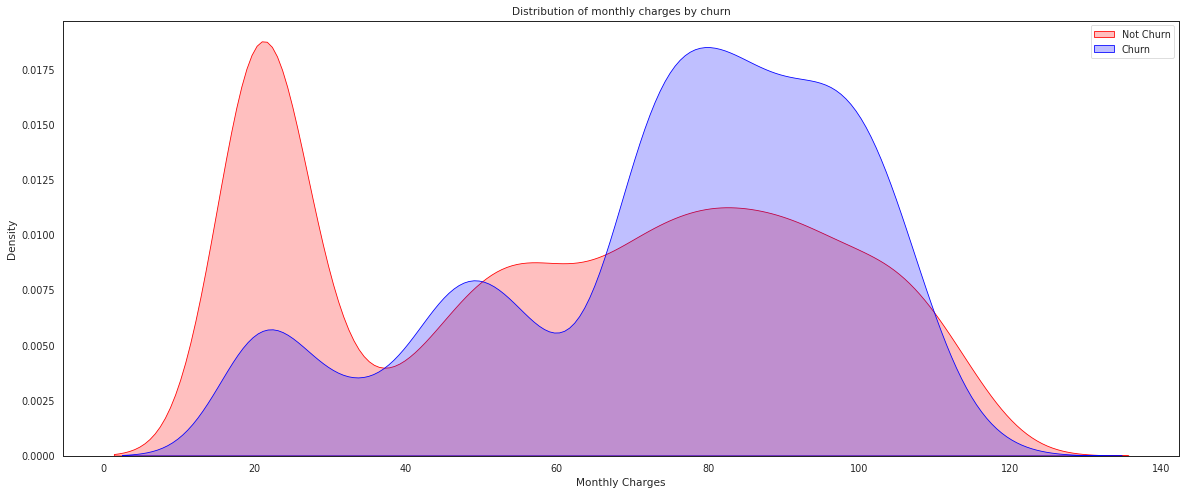

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ],
                 color="Red", shade = True);
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ],
                 ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

Customers with higher Monthly Charges are also more likely to churn. A large proportion of customers with low monlthy charges tend to not opt out of service. 

Text(0.5, 1.0, 'Monthly Charges - Two Year Contract')

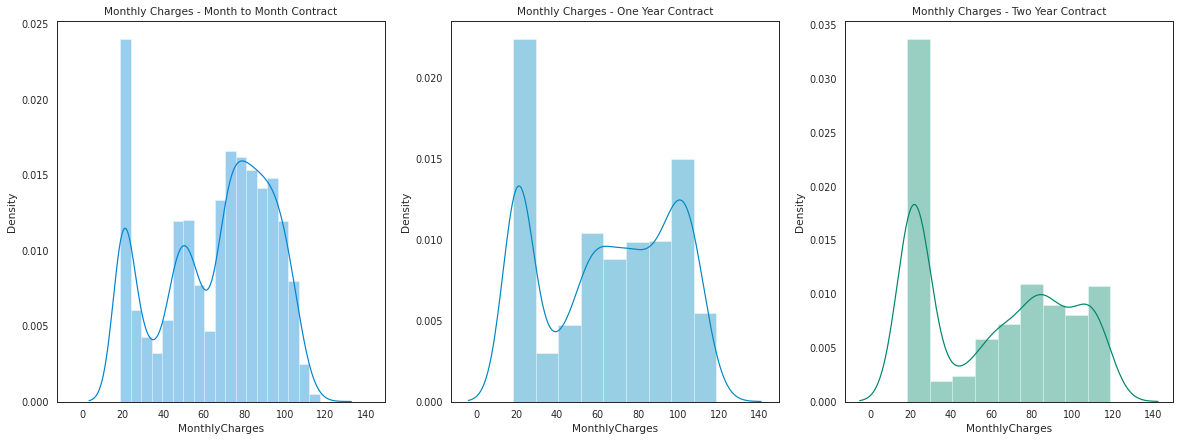

In [ ]:
monthly = data.loc[lambda data: data['Contract'] == "Month-to-month", :]
one_yr = data.loc[lambda data: data['Contract'] == "One year", :]
two_yr = data.loc[lambda data: data['Contract'] == 'Two year', :]

f, axes = plt.subplots(1, 3, figsize=(20, 7), sharex=True)

sns.distplot( monthly["MonthlyCharges"] , color='#0084D3', ax=axes[0]).set_title("Monthly Charges - Month to Month Contract")
sns.distplot( one_yr["MonthlyCharges"] , color='#0089C0', ax=axes[1]).set_title("Monthly Charges - One Year Contract")
sns.distplot( two_yr["MonthlyCharges"] , color='#00866B', ax=axes[2]).set_title("Monthly Charges - Two Year Contract")


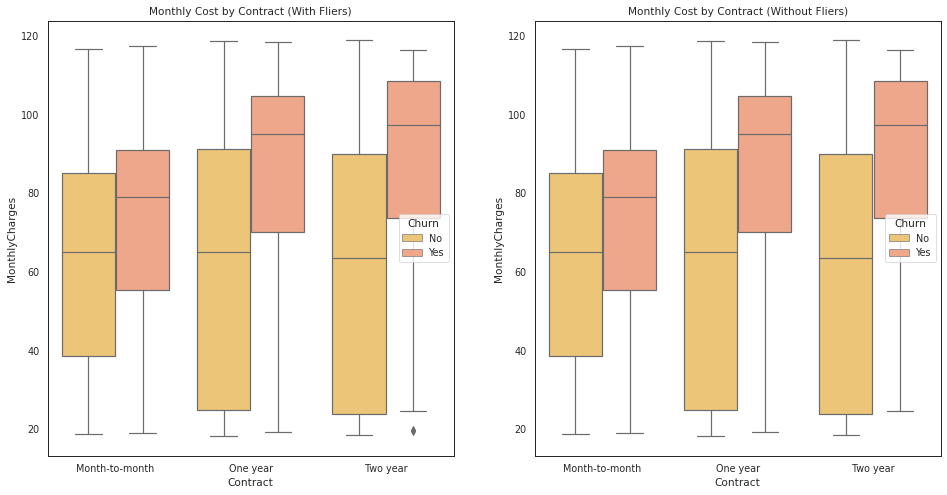

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(16,8))
axis[0].set_title("Monthly Cost by Contract (With Fliers)")
axis[1].set_title("Monthly Cost by Contract (Without Fliers)")

ax = sns.boxplot(x="Contract", y="MonthlyCharges", hue="Churn", data=data, palette=c_scheme, ax=axis[0])
ax = sns.boxplot(x="Contract", y="MonthlyCharges", hue="Churn", data=data, palette=c_scheme, ax=axis[1], showfliers=False)

### Total Charges

The total amount charged to the customer.

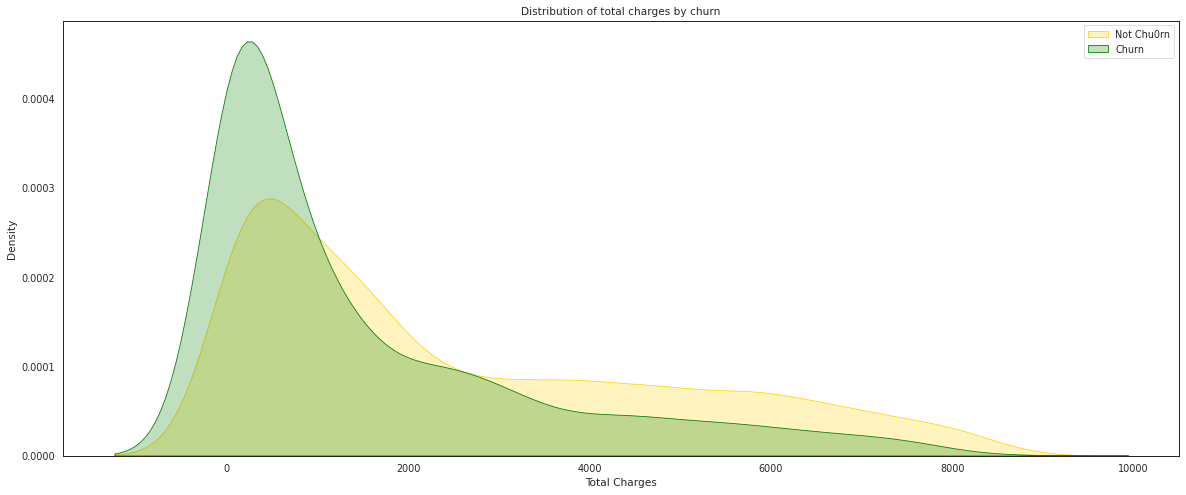

In [ ]:
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'No') ],
                 color="Gold", shade = True);
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'Yes') ],
                 ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

We don't identify any distinct trend here. There seems to peaks in distirubtion for both customers who churned and did not churn for low total charges. 

### Tenure

Number of months the customer has stayed with the company. 

In [ ]:
fig = px.box(data, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
                  title_font=dict(size=25, family='Courier'),
                  title='<b>Tenure vs Churn</b>',
                  )

fig.show()

We see customers we opt to leave od so earlier on, as they have lower tenures with the company. We do identify some outliers who churn but had stayed with the company for a long while (around 70 months). Majoirty of individuals who churn have beem with the company for between 3 and 28 months. 

Text(0.5, 1.0, 'Distribution - Two Year Contract Tenure')

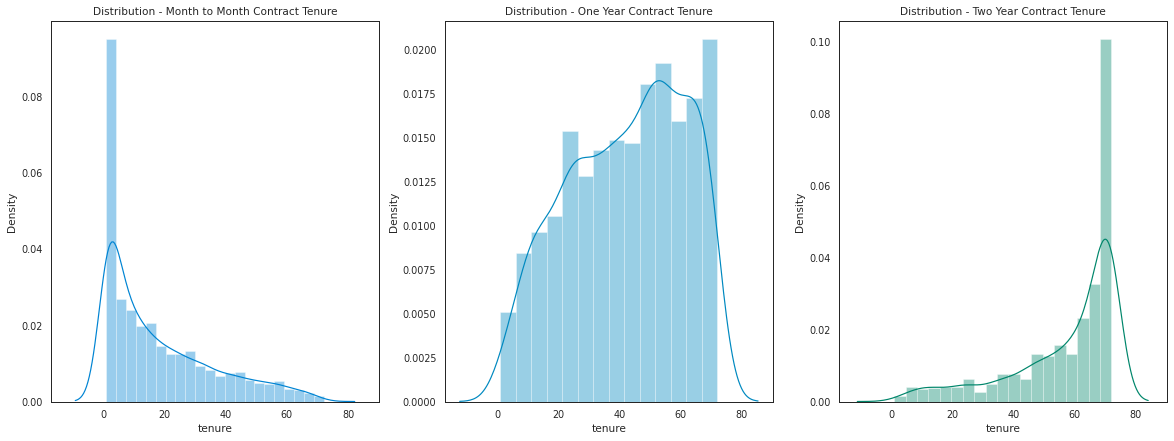

In [ ]:
monthly = data.loc[lambda data: data['Contract'] == "Month-to-month", :]
one_yr = data.loc[lambda data: data['Contract'] == "One year", :]
two_yr = data.loc[lambda data: data['Contract'] == 'Two year', :]

f, axes = plt.subplots(1, 3, figsize=(20, 7), sharex=True)

sns.distplot( monthly["tenure"] , color='#0084D3', ax=axes[0]).set_title("Distribution - Month to Month Contract Tenure")
sns.distplot( one_yr["tenure"] , color='#0089C0', ax=axes[1]).set_title("Distribution - One Year Contract Tenure")
sns.distplot( two_yr["tenure"] , color='#00866B', ax=axes[2]).set_title("Distribution - Two Year Contract Tenure")

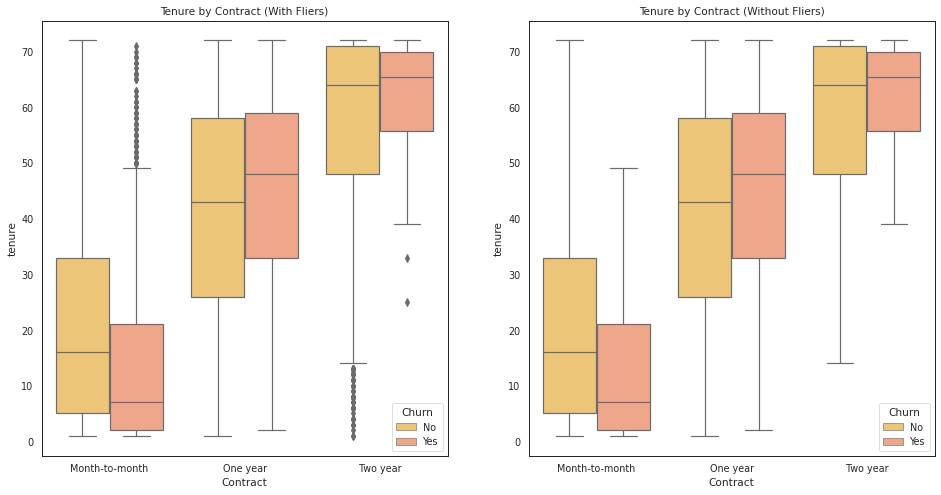

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(16,8))
axis[0].set_title("Tenure by Contract (With Fliers)")
axis[1].set_title("Tenure by Contract (Without Fliers)")

ax = sns.boxplot(x="Contract", y="tenure", hue="Churn", data=data, palette=c_scheme, ax=axis[0])
ax = sns.boxplot(x="Contract", y="tenure", hue="Churn", data=data, palette=c_scheme, ax=axis[1], showfliers=False)

### Summary

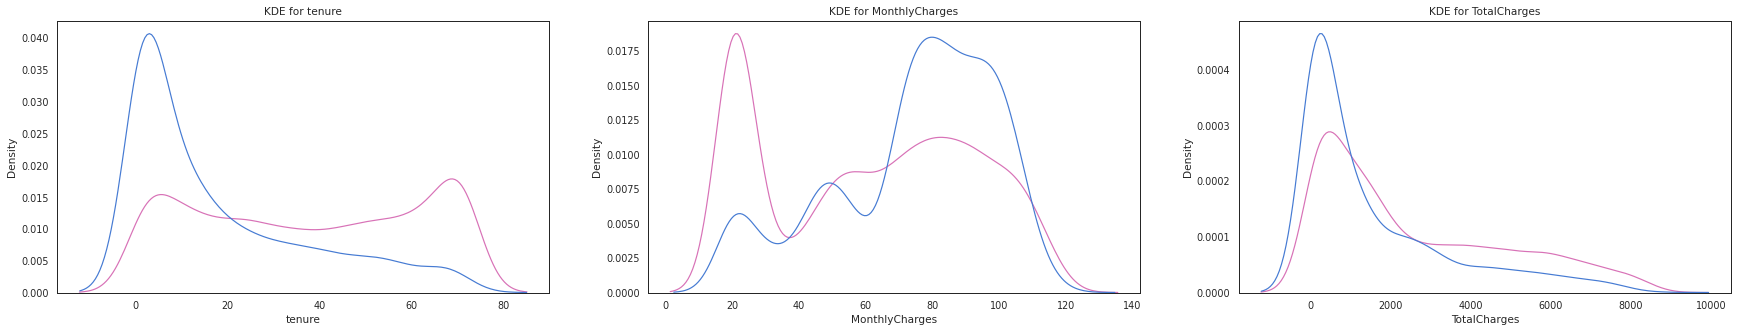

In [ ]:
plt.figure(figsize=(30, 5))

plt.subplot(1,3,1)
plt.title("KDE for {}".format("tenure"))
ax0 = sns.kdeplot(data[data['Churn'] == 'No']["tenure"].dropna(), color='#D872B7', label= 'Churn: No')
ax1 = sns.kdeplot(data[data['Churn'] == 'Yes']["tenure"].dropna(), color='#467BD3', label= 'Churn: Yes')

plt.subplot(1,3,2)
plt.title("KDE for {}".format("MonthlyCharges"))
ax0 = sns.kdeplot(data[data['Churn'] == 'No']["MonthlyCharges"].dropna(), color='#D872B7', label= 'Churn: No')
ax1 = sns.kdeplot(data[data['Churn'] == 'Yes']["MonthlyCharges"].dropna(), color='#467BD3', label= 'Churn: Yes')

plt.subplot(1,3,3)
plt.title("KDE for {}".format("TotalCharges"))
ax0 = sns.kdeplot(data[data['Churn'] == 'No']["TotalCharges"].dropna(), color='#D872B7', label= 'Churn: No')
ax1 = sns.kdeplot(data[data['Churn'] == 'Yes']["TotalCharges"].dropna(), color='#467BD3', label= 'Churn: Yes')

plt.show()


Analysis of these graphs tells us the following: 

* New customers are among the most likely to churn
* Customers with higher monthly charges are more likely to churn 
* Tenure and monthly charges are likely significant features to look at
* Total charges may be less significant due to an effect already observed from tenure and monthly charges

**Key takeways**:

Customers churn the most often before they’ve kept the service for 20 months. 

Customers who churn have higher monthly charges

Total charges may be a less significant feature, due to effects already observed from looking at tenure and monthly charges.



Note: kde (kernel density estimation) is just a way to estimate the probability density, so the area under the plot curve is always 1 (y-axis is the probability). For the tenure we can see that clients that churn have a higher probability of being less than 20 months in the tele company.

In [ ]:
numerics = ['float64', 'int64', 'float32']
numeric_df = data.select_dtypes(include=numerics)

In [ ]:
numeric_df = pd.concat([numeric_df, data["Churn"]], axis=1)

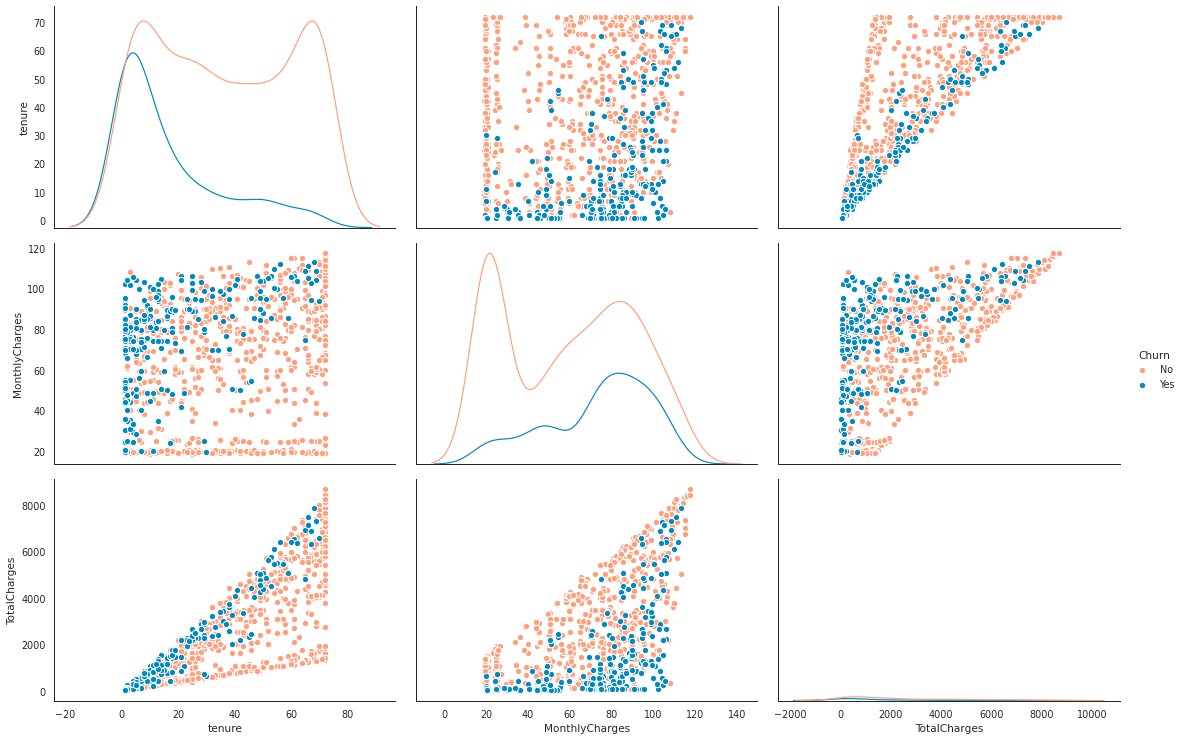

In [ ]:
# Scatterplot
g = sns.PairGrid(numeric_df.sample(n=1000), hue="Churn", palette=['#FF9F7C','#0089C0'], height = 3.5, aspect =1.5)
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=40)
g = g.map_diag(sns.kdeplot)
g = g.add_legend()

We can see a bit of delineation between customers who churn and those who don't in the scatterplot matrix.

Biggest indicators seem to be tenure and monthly charges.
 

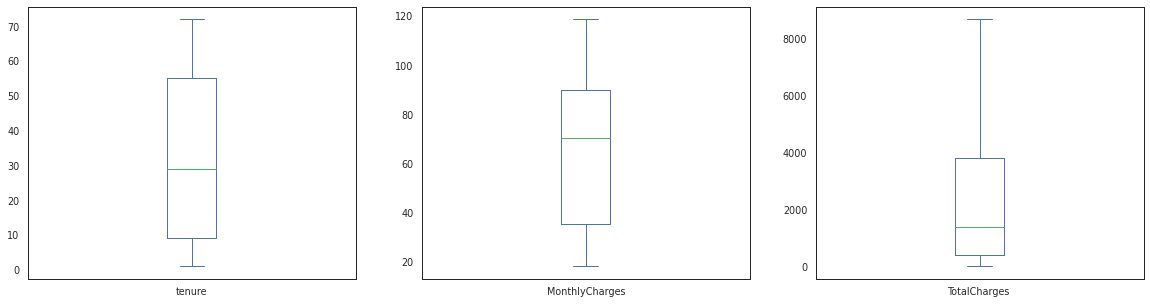

In [ ]:
numeric_df.plot(kind='box', subplots=True, figsize=(20,5))
plt.plot()
plt.show()

Let's look at some summary statistics for our numerical variables.

In [ ]:
# Summary
display(data.describe().transpose())

count         mean          std        min         25%  \
tenure          7032.0    32.421786    24.545260   1.000000    9.000000   
MonthlyCharges  7032.0    64.798208    30.085974  18.250000   35.587500   
TotalCharges    7032.0  2283.300537  2266.771484  18.799999  401.449997   

                        50%          75%          max  
tenure            29.000000    55.000000    72.000000  
MonthlyCharges    70.350000    89.862500   118.750000  
TotalCharges    1397.475037  3794.737488  8684.799805

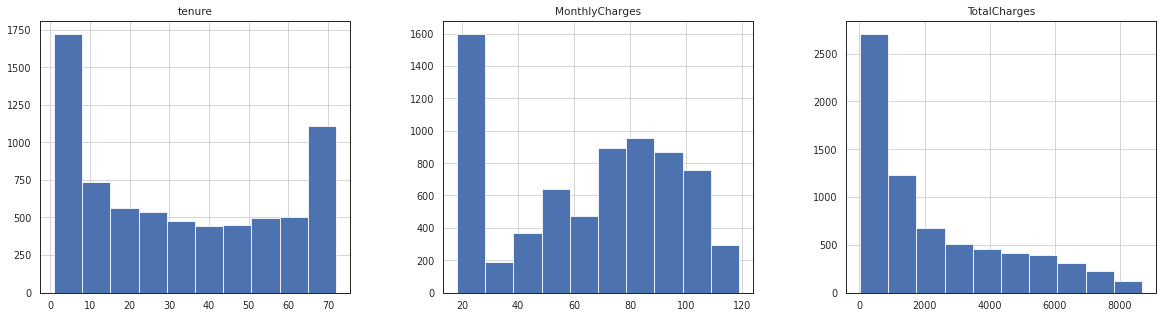

In [ ]:
numeric_df.hist(layout=(1,3), figsize=(20,5))
plt.plot()
plt.show()

While we looked at how the features related to each other and how they related to the feature we're trying to predict, we can see from these plots that the numerical features are not normally distributed. 

## Creating Categorical Features

As we've seen throughout the exploration of our categorical variables, our continuous variables do have some impact on churn. Specifically the monthly charges and tenure options. 

Rather than normalize them between 0 and 1, I want to break them into several groups. "High, medium, and low" monthly costs, dictated by our KDE plots above. 

The bins will be as follows for monthly costs, broken up by the midpoint between the 25 and 50 IQR, and the 50 and 75 IQR.

"Low" costs from 0-53 dollars  
"Medium" costs from 54-79 dollars  
"High" costs from above 80 dollars to the max of 118 dollars/month  

Similarly, we break tenure into three categories of "low" "medium" and "high" based on the dataset's max client tenure divided into 3 categories. Thus we get:

"Low" tenure as 24 months or less  
"Medium" tenure as 25-48 months  
"High" tenure above 48 months

Finally, we break total charge into three categories, also "low", "medium" and "high", based on the mid-point between the 25th and 50th percentile, and between the 50th and 75th percentile:

"Low" total charge as below 899.50 dollars lifetime
"Medium" total charge as a lifetime amount between 899.51 and 2594 dollars
"High" total charge as a lifetime amount above 2595 dollars.


In [ ]:
data['TotalCharges'].min()

18.8

In [ ]:
monthly_bin = []

for x in data['MonthlyCharges']:
    if x <= 53:
        monthly_bin.append('Low')
    elif  x > 80:
        monthly_bin.append('High')
    else:
        monthly_bin.append('Medium')
        

In [ ]:
tenure_bin = []

for x in data['tenure']:
    if x <= 24:
        tenure_bin.append('Low')
    elif x > 48:
        tenure_bin.append('High')
    else:
        tenure_bin.append('Medium')

In [ ]:
charges_bin = []

for x in data['TotalCharges']:
    if x <= 899.5:
        charges_bin.append('Low')
    elif x > 2595:
        charges_bin.append('High')
    else:
        charges_bin.append('Medium')
    

In [ ]:
numerics = ['int64', 'float64', 'float32']
objects_df = data.select_dtypes(exclude=numerics)

objects_df['monthly_bin'] = monthly_bin
objects_df['tenure_bin'] = tenure_bin
objects_df['charges_bin'] = charges_bin

In [ ]:
objects_df.head()

gender SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0  Female             0     Yes         No           No  No phone service   
1    Male             0      No         No          Yes                No   
2    Male             0      No         No          Yes                No   
3    Male             0      No         No           No  No phone service   
4  Female             0      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod Churn monthly_bin tenure_bin charges_bin  
0           Electronic check    No         Low        Low         Low  
1               Mailed check    No      Medium     Medium      Medium  
2               Mailed check   Yes      Medium        Low         Low  
3  Bank transfer (automatic)    No         Low     Medium      Medium  
4           Electronic check   Yes      Medium        Low         Low

### Summary of Categorical Variables

We simply draw up a summary by plotting the count plots for all categorical variables in our data set.

In [ ]:
sns.set_style("white")

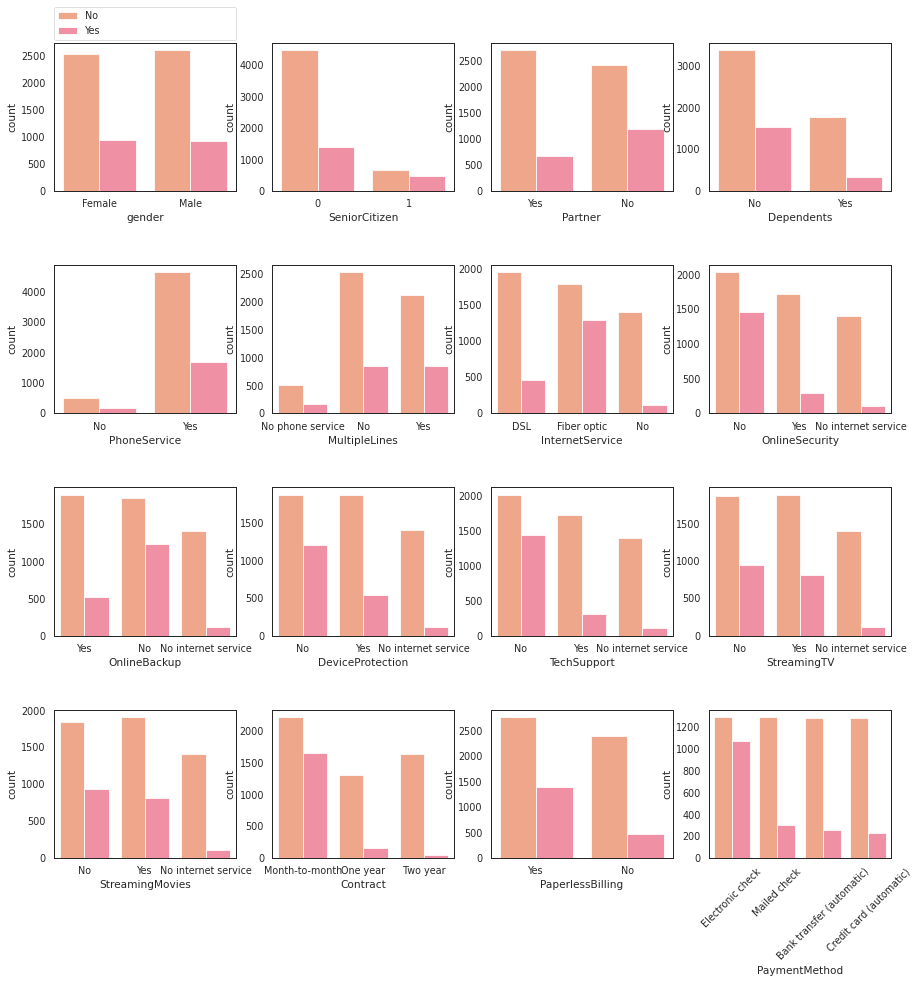

In [ ]:

fig,ax =plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=objects_df.iloc[:,i], hue=objects_df["Churn"], ax=ax[divmod(i,4)], palette=c_scheme[1:])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)

From this initial exploration, we have areas of interest in customers with month-to-month contracts, customers who don't use device protection, customers who don't stream movies, and customers who use paperless billing. Of course we want to consider percentage of the whole. Take the "phone service" category, customers with phone service are more likely to leave the service at first glance, but there are also far more customers who have phone service than not. 

## Features and More Specific Exploration

In [ ]:
objects_df.loc[:, "Churn_yes"] = objects_df.Churn.apply(lambda r: 1 if r == "Yes" else 0)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text major ticklabel objects>)

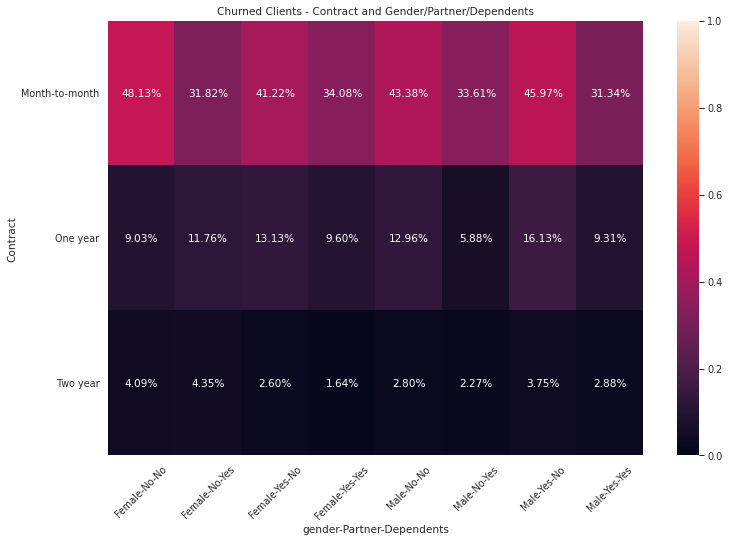

In [ ]:
considerations = ['gender', 'Partner', 'Dependents']

contract = objects_df.pivot_table(values="Churn_yes" , columns=considerations, index='Contract')
plt.figure(figsize = (12,8))
#sns.set(rc={'figure.facecolor':'#757575ff'}, font_scale=1.5)
sns.heatmap(contract, annot=True, fmt="0.2%", vmin=0, vmax=1)
plt.title("Churned Clients - Contract and Gender/Partner/Dependents")
plt.yticks(rotation=0)
plt.xticks(rotation=45)

* Single females with month-to-month contracts are the highest-churn group
* Females with a partner and dependents on two year contracts are the lowest-churn group
* Within month-to-month contracts, having dependents lowers the likelihood of churn slightly
* Females with dependents but not partners are slightly higher-risk within one and two year contracts of churning, than are females with partners and no dependents, or females with partners and dependents
* Males with partners but no dependents are more likely to churn than males with dependents or males with both dependents and partners

Overall the values are close regardless of gender. 

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text major ticklabel objects>)

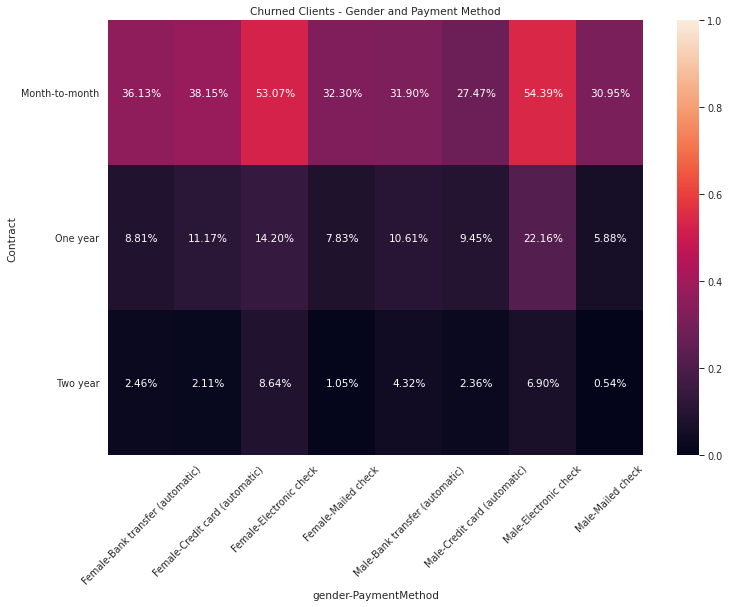

In [ ]:
payment_gender = ['gender', 'PaymentMethod']

contract = objects_df.pivot_table(values="Churn_yes" , columns=payment_gender, index='Contract')
plt.figure(figsize = (12,8))
#sns.set(rc={'figure.facecolor':'#757575ff'}, font_scale=1.5)
sns.heatmap(contract, annot=True, fmt="0.2%", vmin=0, vmax=1)
plt.title("Churned Clients - Gender and Payment Method")
plt.yticks(rotation=0)
plt.xticks(rotation=45)

Electronic check payment methodshave the highest churn rate across both genders and across all contract lenght types. The highest chrun rate is for males paying with electronic check who are on month-to-month contracts. The female counterparts also havea realtively high churn rate, just 1% lower than males. Again, gender doesnt seem to play a signifcant role here. 

In [ ]:
# Partners
Partner = data.loc[lambda data: data['Partner'] == 'Yes', :]
partner_churn = Partner['Churn'].value_counts()

no_partner = data.loc[lambda data: data['Partner'] == 'No', :]
no_part_churn = no_partner['Churn'].value_counts()

# Payment Methods

elec_check = data.loc[lambda data: data['PaymentMethod'] == 'Electronic check', :]
mailed_check = data.loc[lambda data: data['PaymentMethod'] == 'Mailed check', :]
bank_trans = data.loc[lambda data: data['PaymentMethod'] == 'Bank transfer (automatic)', :]
credit = data.loc[lambda data: data['PaymentMethod'] == 'Credit card (automatic)', :]


***
# Classification Modelling

Having done extensive examining of the data, we have a complete understanding of the data set at hand. We also note, that we created several new features we provided "bins" for the numerical variables. We can convert these to categorical, such that all the variables in our data set will be categoricala now. 

The goal of our modelling is now to ascertain which model can  most accurately classify if a customer has churned. Specifcally, we shall examine eight different models, all listed below: 



*   K-nearest Neighbors Classification
*   Logistic Regression
*   Ridge Classification
* Lasso Classification
* Decision Tree Classification
* Random Forest Classification
*  Suppor Vector Classification (SVC)
* Gradient Boost Classification


For each model, the steps we take are outlined roughly below:

1. Creating a test-train split to allow me to test the models against overfitting
2. Evaluation metrics. In this case, cross-validation scores on the training and test data, as well as confusion matricies
3. Feature assessment and tweaking via PCA, GridSearchCV, and SelectKBest

We shall also ensure to seek out for a model that meets the following conditions:

> - The model is suitably accurate across the board, correctly classifying our target variable in both directions. 
> - The model has high recall, as in this case it's more important to accidentally classify a "staying" customer as "churning" than to let a churning customer fall through the cracks.
> - The model runs moderately quickly

## Data Pre-Processing

Before we kick off our modelling, we first ensure we have the correct data and conduct any data pre-processing.

We begin by creating our appropriate data set to use, where we have dummy variables for each categorical variable. We also ensure that all our variables are converted into categorical.

In [ ]:
objects_df = objects_df.drop('Churn_yes', axis=1)

# Create dummies for object dataframes
for i in list(objects_df.columns):
    objects_df[i] = pd.Categorical(objects_df[i]) # Convert all the variables into categorical
dummy = pd.get_dummies(objects_df, drop_first=True) 

In [ ]:
dummy.dtypes

gender_Male                              uint8
SeniorCitizen_1                          uint8
Partner_Yes                              uint8
Dependents_Yes                           uint8
PhoneService_Yes                         uint8
MultipleLines_No phone service           uint8
MultipleLines_Yes                        uint8
InternetService_Fiber optic              uint8
InternetService_No                       uint8
OnlineSecurity_No internet service       uint8
OnlineSecurity_Yes                       uint8
OnlineBackup_No internet service         uint8
OnlineBackup_Yes                         uint8
DeviceProtection_No internet service     uint8
DeviceProtection_Yes                     uint8
TechSupport_No internet service          uint8
TechSupport_Yes                          uint8
StreamingTV_No internet service          uint8
StreamingTV_Yes                          uint8
StreamingMovies_No internet service      uint8
StreamingMovies_Yes                      uint8
Contract_One 

In [ ]:
dummy.head()

gender_Male  SeniorCitizen_1  Partner_Yes  Dependents_Yes  \
0            0                0            1               0   
1            1                0            0               0   
2            1                0            0               0   
3            1                0            0               0   
4            0                0            0               0   

   PhoneService_Yes  MultipleLines_No phone service  MultipleLines_Yes  \
0                 0                               1                  0   
1                 1                               0                  0   
2                 1                               0                  0   
3                 0                               1                  0   
4                 1                               0                  0   

   InternetService_Fiber optic  InternetService_No  \
0                            0                   0   
1                            0                   0   
2                            0                   0   
3                            0                   0   
4                            1                   0   

   OnlineSecurity_No internet service  ...  \
0                                   0  ...   
1                                   0  ...   
2                                   0  ...   
3                                   0  ...   
4                                   0  ...   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  Churn_Yes  monthly_bin_Low  monthly_bin_Medium  \
0                           0          0                1                   0   
1                           1          0                0                   1   
2                           1          1                0                   1   
3                           0          0                1                   0   
4                           0          1                0                   1   

   tenure_bin_Low  tenure_bin_Medium  charges_bin_Low  charges_bin_Medium  
0               1                  0                1                   0  
1               0                  1                0                   1  
2               1                  0                1                   0  
3               0                  1                0                   1  
4               1                  0                1                   0  

[5 rows x 34 columns]

In [ ]:
# info on our new data 
print("Our data set with dummy variables has {} samples with {} features each.".format(*dummy.shape))

Our data set with dummy variables has 7032 samples with 34 features each.


Below we shall create our training and testing data, using the train)test_split function from sklearn module. We set the seed to make it reporducible. These data sets will be used for the fitting and validation of the models we examine. Note we use 70/30 split. That is 70% of our data is used to train and 30% is used to test.

In [ ]:
# Create train and test split
features = dummy.drop(["Churn_Yes"], axis=1).columns
X = dummy[features]
Y = dummy["Churn_Yes"]
validation_size = 0.30
seed = 9
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

We can use the Counter object to summarize the number of examples in each class.

In [ ]:
print("normal data distribution: {}".format(Counter(Y_train)))

normal data distribution: Counter({0: 3595, 1: 1327})


### Class Imbalance and SMOTE

We notice that we have relatively imbalanced data. Imbalanced classification involves developing predictive models on classification datasets that have a relatively severe class imbalance. The challenge of working with imbalanced datasets is that most machine learning techniques and statistical methods will ignore, and in turn have poor performance on, the minority class - i.e., there are too few examples of the minority class for a model to effectively learn the decision boundary. This is a problem given that typically it is performance on the minority class that is most important - which is the case here with customer churn. One way to solve this problem is to oversample the examples in the minority class. 

We shall make use of a type of data augmentation for the minority class known as SMOTE. The idea behind **Synthetic Minority Oversampling Technique (SMOTE)**, is new examples can be synthesized from the existing examples. 



> Essentially, SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b ([SMOTE, 2002](https://arxiv.org/abs/1106.1813)).

The approach is effective because new synthetic examples from the minority class are created that are plausible, that is, are relatively close in feature space to existing examples from the minority class.

**Possible drawbacks**: synthetic examples are created without considering the majority class, possibly resulting in ambiguous examples if there is a strong overlap for the classes.

***TLDR***; SMOTE works by creating synthetic (duplicate) samples of the minority class (here churners) hence making it equal to the majority class SMOTE does this by selecting similar records and altering them one column at a time by a random amount with the difference to the neighbouring records



In [ ]:
# Trying to get more balanced data

sm = SMOTE(random_state=12)
X_train, Y_train = sm.fit_resample(X_train, Y_train)

In [ ]:
print("SMOTE data distribution: {}".format(Counter(Y_train)))

SMOTE data distribution: Counter({0: 3595, 1: 3595})


### Create the Model Evaluation Report

We shall also create a function which will generate all the neccasary infromation to evaluate a model's prediction and performance. 

In [ ]:
def evaluation_report(model, X_train, Y_train, X_test, Y_test, prediction):
    
    #Print classification report
    print(classification_report(Y_test, prediction, target_names=['Churn_No', 'Churn_Yes']))
    
    #Building confusion matrix
    confusion_m = confusion_matrix(Y_test, prediction)
    print(confusion_m)
    
    # rc = 'axes.facecolor':'#757575ff', 'figure.facecolor':'#757575ff',
    
    #Create the heatmap of confusion matrix
    plt.figure(figsize = (12,8))
    sns.set(rc={'axes.grid': False, 'axes.linewidth': 1 }, font_scale=1.5)
    sns.heatmap(confusion_m, 
            cmap='Purples_r', 
            annot=True, 
            linewidths=0.5)
    plt.title('{} Confusion Matrix for Test Set'.format(model))
    plt.xlabel('Predicted Class')
    plt.ylabel('Real Class')
    plt.show()
    
    scores = cross_val_score(model, X_train, Y_train, cv=10)
    print('Cross Validation Accuracy Scores: {:.3f}(+/- {:.2f})'.format(scores.mean(), scores.std()*2))

    scores_Test = cross_val_score(model, X_test, Y_test, cv=10)
    print('Cross Validation Accuracy Scores - Test Set: {:.3f}(+/- {:.2f})'.format(scores_Test.mean(), scores_Test.std()*2))

## 1. K-Nearest Neighbours Classification

This represents our first model. We begin by breifly describing the algorithm.

### Overview

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another.   It is a versatile algorithm also used for imputing missing values and resampling datasets. As the name suggests, KNN considers the K nearest neighbours (i.e., data points) to predict  class or continuous value for the new datapoint ([IBM](https://www.ibm.com/za-en/topics/knn)). Another great resource for KNN is found [here](https://sebastianraschka.com/pdf/lecture-notes/stat479fs18/02_knn_notes.pdf).

Pseudocode for KNN (Classification):

1. Load the training data
2. Prepare data by scaling, missing value treatment, and dimensionality reduction as required.
3. Find the optimal value for K
4. Predict a class value for new data:
  - Calculate distance $(X, Xi)$ from $i=1,2,3,….,n$. 
  Where $X =$ new data point, $X_i=$ training data, distance as per your chosen distance metric.
  - Sort these distances in increasing order with corresponding train data.
  - From this sorted list, select the top ‘K’ rows.
  - Find the most frequent class from these chosen ‘K’ rows. This will be your predicted class.



K is a crucial parameter in the KNN algorithm. As such we need to determine this. We began by using error curves to suggest and optimal K value. We use a `GridSearchCV()` below to find the optimal K value. 

In [ ]:
knn_model = KNeighborsClassifier() 

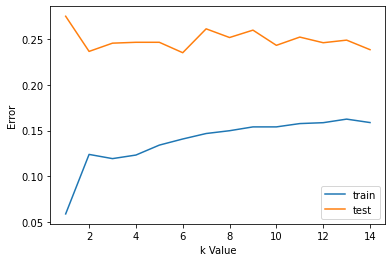

In [ ]:
error1= []
error2= []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    y_pred1= knn.predict(X_train)
    error1.append(np.mean(Y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    error2.append(np.mean(Y_test!= y_pred2))
# plt.figure(figsize(10,5))
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

6 might be the suggested value. We see similar error scores when using 2 or 14. Let's use a grid search. The grid search provided by `GridSearchCV` exhaustively generates candidates from a grid of parameter values specified with the `param_grid` parameter.

In [ ]:
# Determine the parameter values that should be searched

k_range = list(range(1, 10))
param_grid = dict(n_neighbors=k_range)

In [ ]:
# GridSearchCV to search for the best parameters

times = []

start = time.time()
grid = GridSearchCV(knn_model, param_grid, verbose=1, cv=10, scoring='accuracy')
grid.fit(X_train, Y_train)
Y_pred_knn = grid.predict(X_test)
KNN_time = time.time() - start
times.append(KNN_time)
print ("Runtime %0.2f" % (time.time() - start))

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Runtime 14.53


In [ ]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.815855354659249
{'n_neighbors': 6}


In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)

In [ ]:
# Accuracy
print(metrics.accuracy_score(Y_test,Y_pred_knn))

0.7649289099526067


              precision    recall  f1-score   support

    Churn_No       0.84      0.84      0.84      1568
   Churn_Yes       0.54      0.55      0.55       542

    accuracy                           0.76      2110
   macro avg       0.69      0.70      0.69      2110
weighted avg       0.77      0.76      0.77      2110

[[1315  253]
 [ 243  299]]


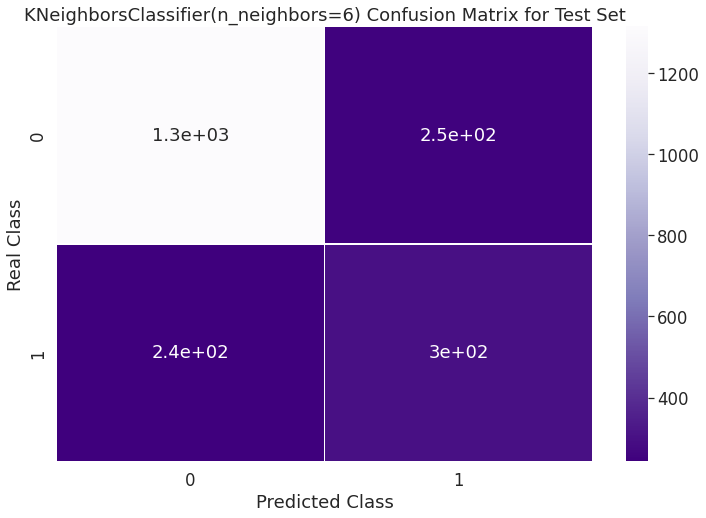

Cross Validation Accuracy Scores: 0.816(+/- 0.16)
Cross Validation Accuracy Scores - Test Set: 0.770(+/- 0.05)


In [ ]:
evaluation_report(knn, X_train, Y_train, X_test, Y_test, Y_pred_knn)

Accuracy scores for the test set, overall, are 76%, not fantastic and not terrible. However accurately predicting customers who will leave is a problem -- while we classify 83% of users who are not leaving correctly, we only have about a 50/50 chance of correctly guessing those who will stay. 

Therefore this model isn't the best for our given task.

***

## 2. Logistic Regression

TLDR; Logistic regression is a statistical method for predicting binary classes. Is a special case of linear regression where the target variable is categorical in nature. It uses a log of odds as the dependent variable. Predicts the probability of occurrence of a binary event utilizing a logit function. 


Logistic regressionis a classical statistial model (often called the *logit model*) used for classification problems. Essentially, logistic regression estimates the probability of an event occurring, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure. This is also commonly known as the log odds, or the natural logarithm of odds, and this logistic function is represented by the following formulas:

$\text{Logit}(\pi) = \frac{1}{(1+ exp(-\pi))}$

$\ln(\frac{\pi}{(1-\pi)}) = \beta_0 + \beta_1\cdot X_1 + … + \beta_k\cdot X_k$

Here, $\text{logit}(\pi)$ is the dependent or response variable and x is the independent variable. The beta parameter, or coefficient, in this model is commonly estimated via maximum likelihood estimation (MLE). This method tests different values of beta through multiple iterations to optimize for the best fit of log odds. All of these iterations produce the log likelihood function, and logistic regression seeks to maximize this function to find the best parameter estimate. Note, logistic regression is often used in churn prediction. 

- More information and compariosns to linear regression is found [here](https://www.ibm.com/topics/logistic-regression)
- and a tutorial [here](https://www.datacamp.com/tutorial/understanding-logistic-regression-python).



In [ ]:
# Model
logmodel = LogisticRegression() 

In [ ]:
# Define the parameter values that should be searched
C = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [ ]:
# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(C)
print(param_grid)

{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


In [ ]:
# instantiate and fit the grid
grid = GridSearchCV(logmodel, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='accuracy')

In [ ]:
# Logistic Regression
start = time.time()
grid.fit(X_train, Y_train)
log_reg_prediction = grid.predict(X_test)
log_reg_time = (time.time() - start)
times.append(log_reg_time)
print ("Runtime %0.2f" % log_reg_time)

Runtime 10.60


In [ ]:
# View the complete results
grid.cv_results_

{'mean_fit_time': array([0.06714015, 0.11145613, 0.1491823 , 0.17352538, 0.17125139,
        0.16908228, 0.16622853]),
 'std_fit_time': array([0.00606478, 0.00948535, 0.01780887, 0.00959197, 0.00954423,
        0.01199527, 0.00542365]),
 'mean_score_time': array([0.00348773, 0.00378675, 0.00346532, 0.00353773, 0.00413227,
        0.00344732, 0.00344684]),
 'std_score_time': array([8.68830931e-05, 8.19631075e-04, 6.52991188e-05, 1.90951107e-04,
        1.92392692e-03, 6.67417415e-05, 7.97439723e-05]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100},
  {'C': 1000}],
 'split0_test_score': array([0.60917942, 0.72461752, 0.74269819, 0.74408901, 0.74269819,
        0.74269819, 0.74269819]),
 'split1_test_score': array([0.60500695, 0.68428373, 0.71766342, 0.7218

In [ ]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.8148817802503476
{'C': 1}


In [ ]:
logmodel = LogisticRegression(C=1)
logmodel.fit(X_train, Y_train)
log_reg_pred = logmodel.predict(X_test)

In [ ]:
# Accuracy
print(metrics.accuracy_score(Y_test,log_reg_pred))

0.7928909952606635


              precision    recall  f1-score   support

    Churn_No       0.87      0.85      0.86      1568
   Churn_Yes       0.59      0.64      0.61       542

    accuracy                           0.79      2110
   macro avg       0.73      0.74      0.74      2110
weighted avg       0.80      0.79      0.80      2110

[[1326  242]
 [ 195  347]]


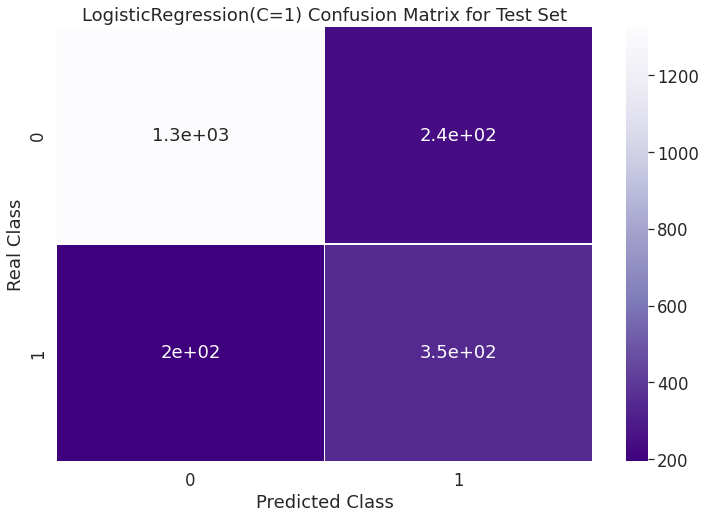

Cross Validation Accuracy Scores: 0.815(+/- 0.13)
Cross Validation Accuracy Scores - Test Set: 0.811(+/- 0.04)


In [ ]:
evaluation_report(logmodel, X_train, Y_train, X_test, Y_test, log_reg_pred)

We have slightly better results with vanilla logistic regression thant we had with KNN classification. Now we have 64% of churners being identified as opposed to barely more than 50%. Let's look at our subsets of logistic regression: Ridge and LASSO

## 3. Ridge Classification


**TLDR**; This classifier first converts the target values into {-1, 1} and then treats the problem as a regression task. Ridge regression puts constraint on the coefficients. It is a solution for overfitting, producing models with less variance. 

Essentially Ridge allows you to regularize ("shrink") coefficient - puts constraint on the coefficients - estimates made by linear regression (OLS). This means that the estimated coefficients are pushed towards 0, to make them work better on new data-sets ("optimized for prediction"). 

As mentioned, ridge regression’s advantage over least squares is rooted in the bias-variance trade-off. As $\lambda$ increases, the flexibility of the ridge regression fit decreases, leading to decreased variance but increased bias. That is; as $\lambda$ increases increases, the shrinkage of the ridge coefficient estimates leads to a substantial reduction in the variance of the predictions, at the expense of a slight increase in bias.


We shall use `RidgeClassifier` from `sklear.linear_model`. The important parameter is `alpha` - Regularization strength. 

Here we shall use a Ridge Classifier Model. The algorithm is outlined below: 
1. convert the target values into {-1, 1}
2. solve the problem as regression task (multi-output regression in the multiclass case)

> The Cost function: mean-square error (MSE) + L2 Penalty. That is Cost = loss + Regularisation Term.

- More information found [here](https://www.engati.com/glossary/ridge-regression) and in [ISLR](https://hastie.su.domains/ISLR2/ISLRv2_website.pdf) (Introduction to Statistical Learning)


In [ ]:
from sklearn.linear_model import RidgeClassifier 
ridge = RidgeClassifier()

In [ ]:
# Define the parameter values that should be searched
param_grid = {'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}

In [ ]:
# Ridge Classifier
start = time.time()
grid = GridSearchCV(ridge, param_grid, verbose=3, cv=10, scoring='accuracy')
grid.fit(X_train, Y_train)
Y_pred_ridge = grid.predict(X_test)
ridge_time = time.time() - start
times.append(ridge_time)
print ("Runtime %0.2f" % ridge_time)

Fitting 10 folds for each of 13 candidates, totalling 130 fits
[CV 1/10] END .........................alpha=25;, score=0.501 total time=   0.0s
[CV 2/10] END .........................alpha=25;, score=0.501 total time=   0.0s
[CV 3/10] END .........................alpha=25;, score=0.501 total time=   0.0s
[CV 4/10] END .........................alpha=25;, score=0.590 total time=   0.0s
[CV 5/10] END .........................alpha=25;, score=0.833 total time=   0.0s
[CV 6/10] END .........................alpha=25;, score=0.725 total time=   0.0s
[CV 7/10] END .........................alpha=25;, score=0.812 total time=   0.0s
[CV 8/10] END .........................alpha=25;, score=0.791 total time=   0.0s
[CV 9/10] END .........................alpha=25;, score=0.789 total time=   0.0s
[CV 10/10] END ........................alpha=25;, score=0.804 total time=   0.0s
[CV 1/10] END .........................alpha=10;, score=0.501 total time=   0.0s
[CV 2/10] END .........................alpha=1

- $\lambda$ is the tuning factor which has control over the strength of the penalty term.
  - When $\lambda = 0$, the objective is similar to simple linear regression. You will get the same coefficients as simple linear regression.
  - When $\lambda = \infty $, the coefficients that you get would be zero due to infinite weightage on the square of coefficients as anything less than zero makes the objective infinite.

In [ ]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.6845618915159944
{'alpha': 25}


In [ ]:
ridge = RidgeClassifier(alpha=0.5)
ridge.fit(X_train, Y_train)
Y_pred_ridge = ridge.predict(X_test)

In [ ]:
# Accuracy
print(metrics.accuracy_score(Y_test,Y_pred_ridge))

0.7582938388625592


              precision    recall  f1-score   support

    Churn_No       0.76      0.98      0.86      1568
   Churn_Yes       0.66      0.12      0.21       542

    accuracy                           0.76      2110
   macro avg       0.71      0.55      0.53      2110
weighted avg       0.74      0.76      0.69      2110

[[1534   34]
 [ 476   66]]


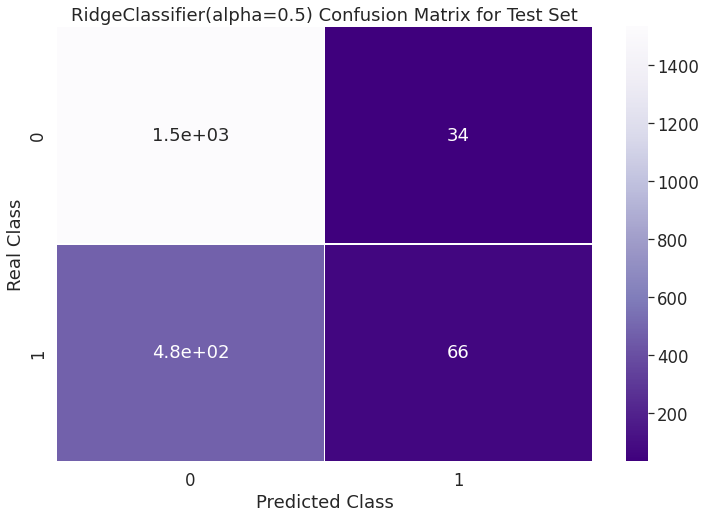

Cross Validation Accuracy Scores: 0.676(+/- 0.26)
Cross Validation Accuracy Scores - Test Set: 0.809(+/- 0.04)


In [ ]:
evaluation_report(ridge, X_train, Y_train, X_test, Y_test, Y_pred_ridge)

A **much** higher recall score on correctly guessing churn (86%). However f1 isn't the best indicator here, so we're going to take a look at the Cohen's Kappa score

Our precision isn't fantastic. While the model has a very high recall rate on predciting if customers churn, the F1 score suggests that the model is lacking in accurately being able to predict if a customer is staying: more customers were falsely predicted of churning who didn't plan to churn.

This isn't necessarily bad, but from a business standpoint it could lead to the company losing more money trying to "keep" customers who weren't in danger of leaving, and it isn't an ideal model because of that.

## 4. LASSO Classification

LASSO (Least Absolute Shrinkage and Selection Operator) regression is almost identical to Ridge Regression.  Like ridge regression, it too adds a penalty for non-zero coefficients. But, while ridge regression imposes an L2 penalty (penalizing the sum of squared coefficients), lasso regression imposes an L1 penalty (penalizing the sum of their absolute values). So the only difference being that we take the absolute value as opposed to the squaring the weights when computing the ridge regression penalty.  Because of this, in LASSO regression, for high values of $\lambda$, many coefficients are completely reduced to zero.

In [ ]:
lasso_model = linear_model.LogisticRegression(penalty = 'l1', solver='liblinear') 


In [ ]:
# Define the parameter values that should be searched
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [ ]:
# Lasso Classifier
start = time.time()
grid = GridSearchCV(lasso_model, param_grid, verbose=1, cv=10, scoring='accuracy')
grid.fit(X_train, Y_train)
Y_pred_lasso_model = grid.predict(X_test)
time_lasso = time.time() - start
times.append(time_lasso)
print ("Runtime %0.2f" % time_lasso)


Fitting 10 folds for each of 7 candidates, totalling 70 fits
Runtime 6.50


In [ ]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.8154381084840056
{'C': 100}


In [ ]:
lasso_model = linear_model.LogisticRegression(penalty = 'l1', C=10, solver='liblinear')
lassfit = lasso_model.fit(X_train, Y_train)
Y_pred_lasso_model = lasso_model.predict(X_test)

In [ ]:
# Accuracy
print(metrics.accuracy_score(Y_test,Y_pred_lasso_model))

0.7909952606635071


              precision    recall  f1-score   support

    Churn_No       0.87      0.84      0.86      1568
   Churn_Yes       0.59      0.64      0.61       542

    accuracy                           0.79      2110
   macro avg       0.73      0.74      0.73      2110
weighted avg       0.80      0.79      0.79      2110

[[1322  246]
 [ 195  347]]


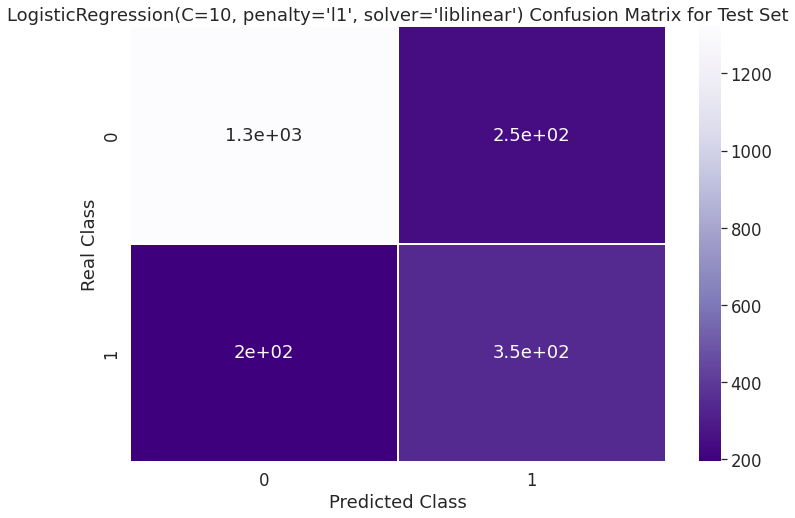

Cross Validation Accuracy Scores: 0.815(+/- 0.13)
Cross Validation Accuracy Scores - Test Set: 0.810(+/- 0.05)


In [ ]:
evaluation_report(lasso_model, X_train, Y_train, X_test, Y_test, Y_pred_lasso_model)

Again, even though we have a pretty good simple accuracy in our validation scores (80%), when we look more closely at recall and precison, our model leaves us wanting.
This model also takes a very long time to run, about five minutes, which makes it not ideal.

## 5. Decision Classification Tree 

A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes. It starts with a root node, which does not have any incoming branches. The outgoing branches from the root node then feed into the internal nodes, also known as decision nodes. The leaf nodes represent all the possible outcomes within the dataset. 

Decision tree learning employs a divide and conquer strategy by conducting a greedy search to identify the optimal split points within a tree. This process of splitting is then repeated in a top-down, recursive manner until all, or the majority of records have been classified under specific class labels. Smaller trees are more easily able to attain pure leaf nodes—i.e. data points in a single class. However, as a tree grows in size, it becomes increasingly difficult to maintain this purity, and it usually results in too little data falling within a given subtree. When this occurs, it is known as data fragmentation, and it can often lead to overfitting.

 To reduce complexity and prevent overfitting, pruning is usually employed; this is a process, which removes branches that split on features with low importance. The model’s fit can then be evaluated through the process of cross-validation. 

More information on decision trees found [here](https://www.ibm.com/za-en/topics/decision-trees) and in [ISLR](https://hastie.su.domains/ISLR2/ISLRv2_website.pdf) (Introduction to Statistical Learning)

In [ ]:
dtc = DecisionTreeClassifier() 

In [ ]:
# Define the parameter values that should be searched
param_grid = {'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2),'criterion' : ['gini', 'entropy']}

In [ ]:
# instantiate and fit the grid
start = time.time()
grid = GridSearchCV(dtc, param_grid, verbose=1, cv=10, scoring='accuracy')
grid.fit(X_train, Y_train)
Y_pred_clf = grid.predict(X_test)
dtc_time = time.time() - start
times.append(dtc_time)
print ("Runtime %0.2f" % dtc_time)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits
Runtime 96.69


In [ ]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.8082058414464534
{'criterion': 'gini', 'max_depth': 13, 'min_samples_split': 10}


In [ ]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=11, min_samples_split=10)
dtc.fit(X_train, Y_train)
Y_pred_dtc = dtc.predict(X_test)

In [ ]:
# Accuracy
print(metrics.accuracy_score(Y_test,Y_pred_dtc))

0.7725118483412322


              precision    recall  f1-score   support

    Churn_No       0.87      0.82      0.84      1568
   Churn_Yes       0.55      0.65      0.59       542

    accuracy                           0.77      2110
   macro avg       0.71      0.73      0.72      2110
weighted avg       0.79      0.77      0.78      2110

[[1279  289]
 [ 191  351]]


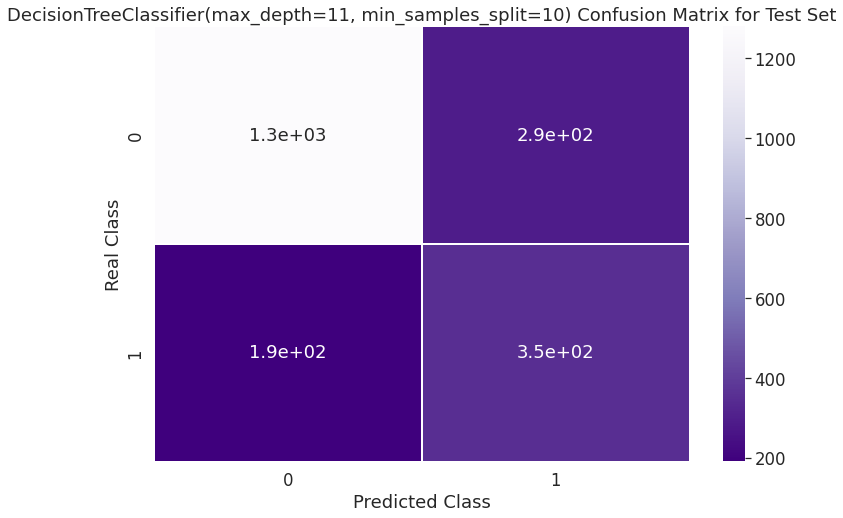

Cross Validation Accuracy Scores: 0.804(+/- 0.08)
Cross Validation Accuracy Scores - Test Set: 0.745(+/- 0.04)


In [ ]:
evaluation_report(dtc, X_train, Y_train, X_test, Y_test, Y_pred_dtc)

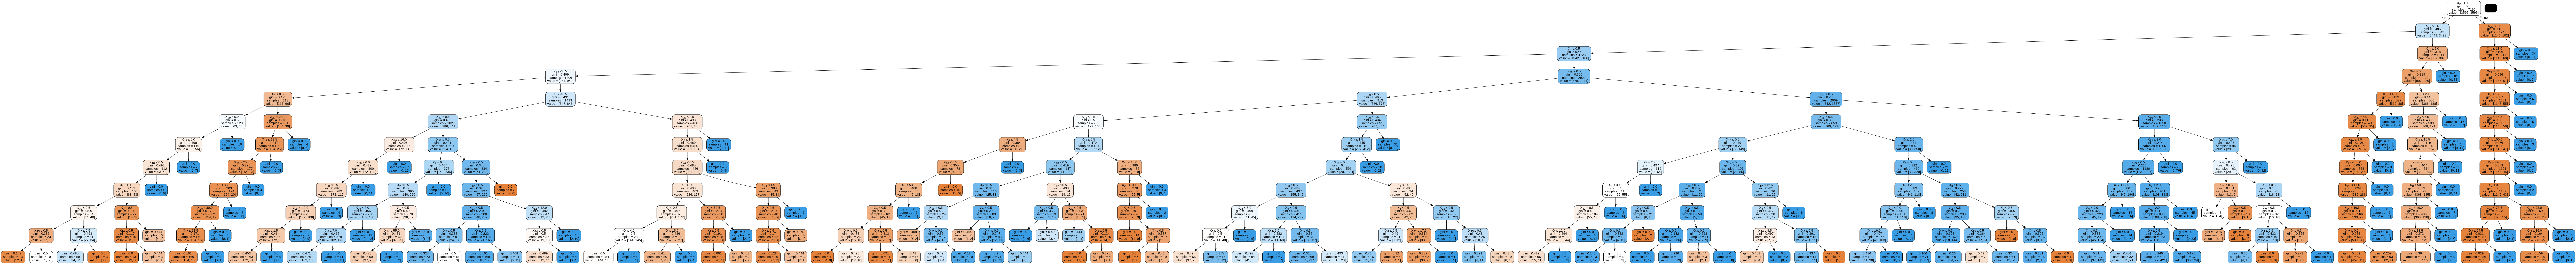

In [ ]:

from six import StringIO

from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

***

## 6. Random Forest

**TLDR**; a random forest is a form of ensemble algorithm, where we have many decisions trees (a forest) whose results are aggregated into one final result. It uses bagging and feature randomness (at each split) when building each individual tree to try to create an uncorrelated forest of trees.

A random forest represent an ensemple method which essentially combines the output of multiple decision trees to reach a single result. An ensemble method is an approach that combines many simple “building block” models in order to obtain a single and potentially very powerful model. In Random Forests, the simple building block is a regression or a classification tree.

The random forest algorithm is an extension of the bagging method as it utilizes both bagging and feature randomness to create an uncorrelated forest of decision trees. That is; as in bagging, we build a number of decision trees on bootstrapped training samples. But when building these decision trees, each time a split in a tree is considered, a random sample of $m$
 predictors is chosen as split candidates from the full set of $p$
 predictors. 

In [ ]:
rfc = ensemble.RandomForestClassifier() 

In [ ]:
# Define the parameter values that should be searched
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 4, num = 1)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(param_grid)

{'n_estimators': [1], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Random Forest Classifier: instantiate and fit the grid
start = time.time()
grid = GridSearchCV(rfc, param_grid, verbose=1, cv=10, scoring='f1')
grid.fit(X_train, Y_train)
Y_pred_rfc = grid.predict(X_test)
rfc_runtime = (time.time() - start)
times.append(rfc_runtime)
print ("Runtime %0.2f" % rfc_runtime)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
Runtime 56.96


In [ ]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.8095875885606272
{'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1}


In [ ]:
rfc = ensemble.RandomForestClassifier(bootstrap=False, max_depth=None, max_features='auto', min_samples_leaf=1, min_samples_split=2, n_estimators=1)
rfc.fit(X_train, Y_train)
Y_pred_rfc = rfc.predict(X_test)



In [ ]:
# Accuracy
print(metrics.accuracy_score(Y_test,Y_pred_rfc))

0.718957345971564


              precision    recall  f1-score   support

    Churn_No       0.84      0.77      0.80      1568
   Churn_Yes       0.46      0.57      0.51       542

    accuracy                           0.72      2110
   macro avg       0.65      0.67      0.66      2110
weighted avg       0.74      0.72      0.73      2110

[[1208  360]
 [ 233  309]]


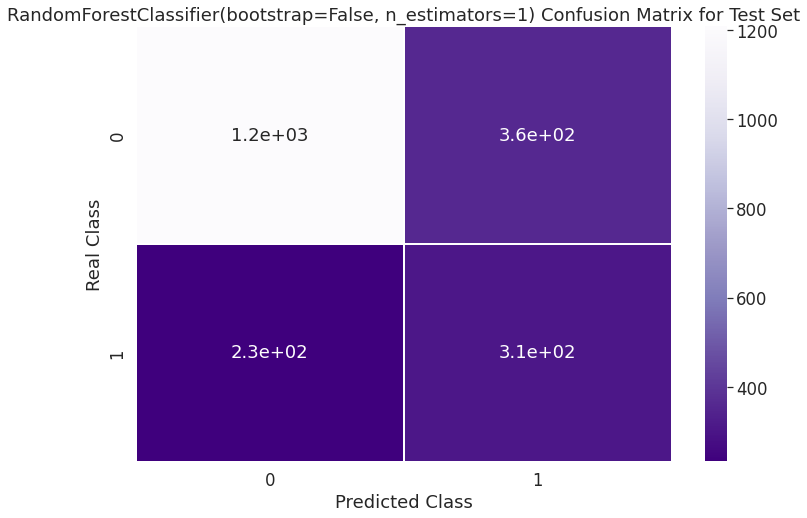

Cross Validation Accuracy Scores: 0.812(+/- 0.13)
Cross Validation Accuracy Scores - Test Set: 0.738(+/- 0.08)


In [ ]:
evaluation_report(rfc, X_train, Y_train, X_test, Y_test, Y_pred_rfc)

***
## SVC Classifier

**TLDR**; The SVM classifier separates data points using a hyperplane with the largest amount of margin. That's why an SVM classifier is also known as a discriminative classifier. SVM finds an optimal hyperplane which helps in classifying new data points.

It is reported that Support Vector Machines (SVM) can offer higher accuracy compared to other classifiers such as logistic regression, and decision trees (reportedly). It is known for its kernel trick to handle nonlinear input spaces. 

SVM's can be used in both classififcation adn regression settings. It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes

SVM's are used in a variety of applications such as face detection, intrusion detection, classification of emails, news articles and web pages, classification of genes, and handwriting recognition. 


- Nice SVM Classifier information found at: [DataCamp Tutorial](https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python)

In [ ]:
svc_model = svm.SVC(kernel = 'rbf') 

The main function of the **kernel** is to transform the given dataset input data into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF are useful for non-linear hyperplane. Polynomial and RBF kernels compute the separation line in the higher dimension. 

The **Radial basis function kernel** (which is what we use) is a popular kernel function commonly used in support vector machine classification. RBF can map an input space in infinite dimensional space.

Regularization parameter in python's Scikit-learn C parameter used to maintain regularization. Here C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimization how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term.

We shall use `GridSearchCV` to find the best C value. 

In [ ]:
# Define the parameter values that should be searched
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [ ]:
# SVC Classifier
start = time.time()
grid = GridSearchCV(svc_model, param_grid, verbose=1, cv=10, scoring='accuracy')
grid.fit(X_train, Y_train)
Y_pred_svc_model = grid.predict(X_train)
svc_time = (time.time() - start)
times.append(svc_time)
print ("Runtime %0.2f" % svc_time)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
Runtime 185.54


In [ ]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.8144645340751042
{'C': 1000}


In [ ]:
svc_model = svm.SVC(kernel = 'rbf', C=1000)
svc_model.fit(X_train, Y_train)
Y_pred_svc_model = svc_model.predict(X_test)

In [ ]:
# Accuracy
print(metrics.accuracy_score(Y_test,Y_pred_svc_model))

0.781042654028436


              precision    recall  f1-score   support

    Churn_No       0.88      0.82      0.85      1568
   Churn_Yes       0.56      0.66      0.61       542

    accuracy                           0.78      2110
   macro avg       0.72      0.74      0.73      2110
weighted avg       0.80      0.78      0.79      2110

[[1288  280]
 [ 182  360]]


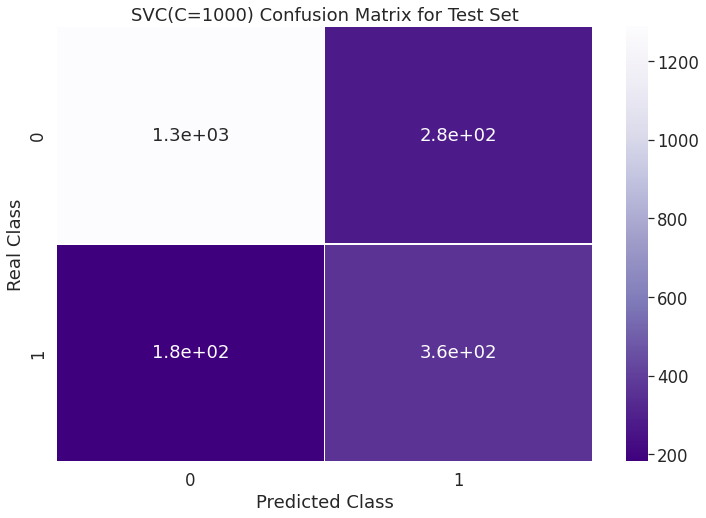

Cross Validation Accuracy Scores: 0.814(+/- 0.14)
Cross Validation Accuracy Scores - Test Set: 0.737(+/- 0.05)


In [ ]:
evaluation_report(svc_model, X_train, Y_train, X_test, Y_test, Y_pred_svc_model)

## XG Boost

Boosting is yet another approach for improving the predictions resulting from a decision tree. Like *bagging*, Boosting is a general approach that can be applied to many statistical learning methods for regression or classification Boosting is an ensemble technique where new models are added to correct the errors made by existing models. Models are added sequentially until no further improvements can be made. Gradient boosting is an approach where new models are created that predict the residuals or errors of prior models and then added together to make the final prediction. It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models.

Recall that bagging involves creating multiple copies of the original train- ing data set using the bootstrap, fitting a separate decision tree to each copy, and then combining all of the trees in order to create a single predic- tive model. Notably, each tree is built on a bootstrap data set, independent of the other trees. Boosting works in a similar way, except that the trees are grown sequentially: each tree is grown using information from previously grown trees. Boosting does not involve bootstrap sampling; instead each tree is fit on a modified version of the original data set. Note that in boosting, unlike in bagging, the construction of each tree depends strongly on the trees that have already been grown. 

XGBoost is an implementation of [gradient boosted](https://en.wikipedia.org/wiki/Gradient_boosting) decision trees designed for speed and performance. 

- More information found [here](https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/) with an example. 

- Trevor hastie presented a talk on gradient boosted machine learning, link found [here](https://www.youtube.com/watch?v=wPqtzj5VZus). 


In [ ]:
gbc = ensemble.GradientBoostingClassifier(n_estimators=600) 

In [ ]:
# Define the parameter values that should be searched
param_grid = {'learning_rate': [0.1, 0.05],
              'max_depth': [4, 8],
              'min_samples_leaf': [20, 50],
              'max_features': [1.0, 0.3] 
              }

In [ ]:
# GBC Classifier
start = time.time()
grid = GridSearchCV(gbc, param_grid, verbose=1, cv=10, scoring='accuracy')
grid.fit(X_train, Y_train)
Y_pred_gbc = grid.predict(X_test)
time_gbc = (time.time() - start)
times.append(time_gbc)
print ("Runtime %0.2f" % time_gbc )

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Runtime 902.40


In [ ]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.8314325452016689
{'learning_rate': 0.05, 'max_depth': 8, 'max_features': 0.3, 'min_samples_leaf': 20}


In [ ]:
gbc = ensemble.GradientBoostingClassifier(n_estimators=600, learning_rate=0.05, max_depth=8, max_features=0.3, min_samples_leaf=20)
gbc.fit(X_train, Y_train)
Y_pred_gbc = gbc.predict(X_test)

In [ ]:
# Accuracy
print(metrics.accuracy_score(Y_test,Y_pred_gbc))

0.7611374407582938


              precision    recall  f1-score   support

    Churn_No       0.85      0.82      0.84      1568
   Churn_Yes       0.53      0.59      0.56       542

    accuracy                           0.76      2110
   macro avg       0.69      0.71      0.70      2110
weighted avg       0.77      0.76      0.77      2110

[[1285  283]
 [ 221  321]]


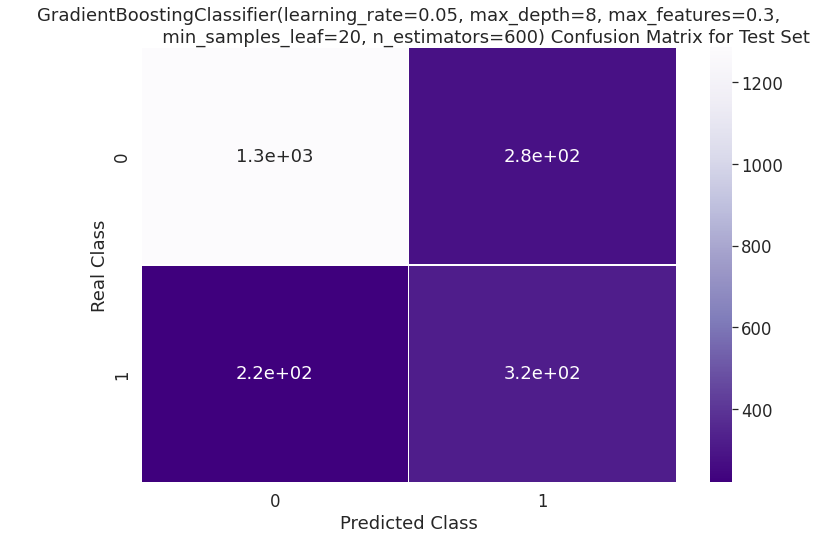

Cross Validation Accuracy Scores: 0.831(+/- 0.15)
Cross Validation Accuracy Scores - Test Set: 0.767(+/- 0.04)


In [ ]:
evaluation_report(gbc, X_train, Y_train, X_test, Y_test, Y_pred_gbc)

***
# Initial Analysis of Models

None of the models performed exceedingly well. Below we assess the perforamnce of all the models with the tuned parameters, using `ROC AUC`. 

The **Receiver Operator Characteristic (ROC)** curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The **Area Under the Curve (AUC)** is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.


- When **AUC = 1**, then the classifier is able to perfectly distinguish between all the Positive and the Negative class points correctly. If, however, the AUC had been 0, then the classifier would be predicting all Negatives as Positives, and all Positives as Negatives. 

- When **$0.5<$AUC$<1$**, there is a high chance that the classifier will be able to distinguish the positive class values from the negative class values. This is so because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives. 

- When **AUC$=0.5$**, then the classifier is not able to distinguish between Positive and Negative class points. Meaning either the classifier is predicting random class or constant class for all the data points.

So, the higher the AUC value for a classifier, the better its ability to distinguish between positive and negative classes.

 



In [ ]:
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=6)))
models.append(('DTC', DecisionTreeClassifier(criterion='gini', max_depth=11, min_samples_split=10)))
models.append(('RFC', RandomForestClassifier(bootstrap=False, max_depth=None, max_features='auto', min_samples_leaf=1, min_samples_split=2, n_estimators=1)))
models.append(('GBC', ensemble.GradientBoostingClassifier(n_estimators=600, learning_rate=0.05, max_depth=8, max_features=0.3, min_samples_leaf=20)))
models.append(('LR', LogisticRegression(C=1)))
models.append(('Ridge', RidgeClassifier(alpha=0.5)))
models.append(('LASSO', LogisticRegression(penalty = 'l1', C=10, solver='liblinear')))
models.append(('SVC', svm.SVC(kernel = 'rbf', C=10)))

# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'

for name, model in models:
    kfold = model_selection.KFold(n_splits = 15)
    cv_results = model_selection.cross_val_score(model, X_test, Y_test, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.788128 (0.041903)
DTC: 0.734150 (0.041435)
RFC: 0.673806 (0.063244)
GBC: 0.798529 (0.042525)
LR: 0.840322 (0.045969)
Ridge: 0.833535 (0.043909)
LASSO: 0.840240 (0.045656)
SVC: 0.771828 (0.052883)


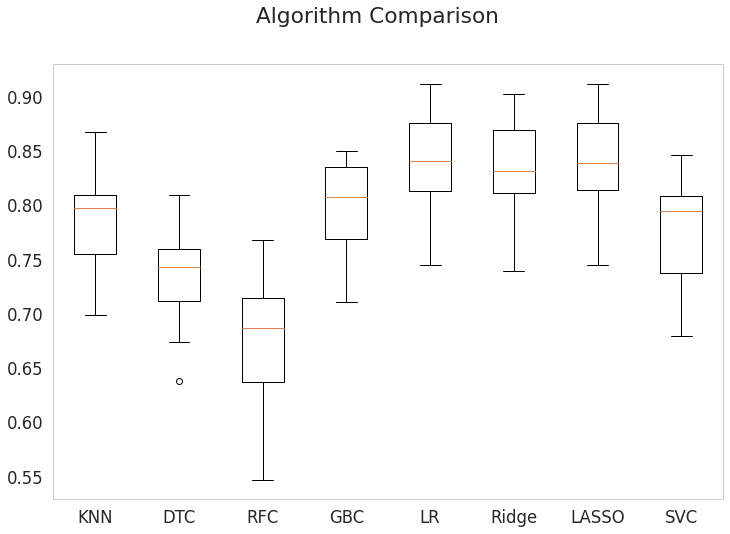

In [ ]:
# boxplot algorithm comparison
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid(linewidth=1, alpha=0.3, color='white')
#plt.xticks(fontsize=fontsize)
#plt.yticks(fontsize=fontsize)
plt.show()

Logistic regression, ridge and LASSO provided the highest accuracy rates for classification, though they all provided lackluster recall results. Recall is important, because we want to be able to accurately predict if a client is high-risk for churn or if they are going to churn.

Part of the reason we may think the results are so varied is due to the natural variance in the dataset. Although we don't have tons of data, we have enough to know that there are several generations of people and people of many demographics who use this phone company. For example: single adults, partnered adults with no dependents, single adults with dependents, and seniors, all use this company and their data is all stored.

An obvious correction or further improvement would be if there's a way to take a slice of the population and look at *that* data to see if we can get better recall rates. Moreover we could inciorporate age of indivual into the data. 

## Time Analysis - Model Training

Text(0.5, 1.0, 'GridSearchCV Time Elapsed (s)')

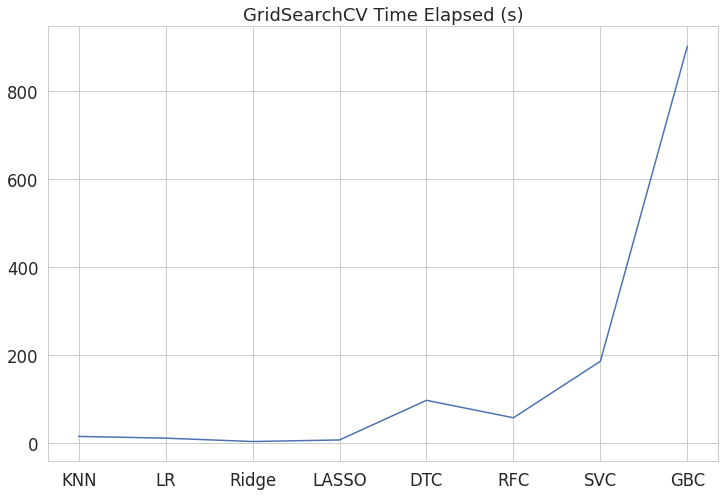

In [ ]:
time_labels = ['KNN','LR','Ridge','LASSO','DTC','RFC','SVC','GBC']

plt.figure(figsize = (12,8))
sns.lineplot(time_labels,times).set_title("GridSearchCV Time Elapsed (s)")

Process of Analysis. 

First we try with all categorical variables.

We then compare all models. Best pwerfromaing models we applied PCA to see improvement. 

From here, we assessed all models with continous and categorical variables.


***
# PCA Components for Modelling

**TLDR**; PCA starts with the data-set being  normalized and then the eigen-analysis of the covariance matrix is done. Then to reduce the dimension, the data-set is projected onto the first few principal components. It is am emthod to reduce dimensionality of data, whilst retaining as much information as possible in the data. 

Principal components analysis (PCA) refers to the process by which principal components are computed, and the subsequent use of these components in understanding the data. PCA is an *unsupervised* approach, since it involves only a set of features $X_1, X_2, . . . , X_p$ and no associated response $Y$. Apart from producing derived variables for use in supervised learning problems, PCA also serves as a tool for data visualization (of the observations or of the variables).

PCA seeks a small number of dimensions that are as interesting as possible, where the concept of interesting is measured by the amount that the observations vary along each dimension. Each of the dimensions found by PCA is a linear combination of the $p$ features.




In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Standardize the feature matrix
X = StandardScaler().fit_transform(X_train)

We automicatically select the number of components which explain over 90% of the variation in the data. We shall not use a scree plot to further deduct how mnay components to choose. 

In [ ]:
# Create a PCA that will retain 90% of the variance
pca = PCA(n_components=0.90, whiten=True)

# Conduct PCA
X_pca = pca.fit_transform(X)

In [ ]:
# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 33
Reduced number of features: 23


## Logistic with PCA

In [ ]:
# We'll use pipeline for easy transformations
# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

from sklearn.pipeline import Pipeline

In [ ]:
pipe_logreg = Pipeline([('pca', pca), ('logistic', logmodel)])
pipe_logreg.fit(X_train, Y_train)
pred_logreg = pipe_logreg.predict(X_test)

              precision    recall  f1-score   support

    Churn_No       0.77      0.89      0.82      1568
   Churn_Yes       0.41      0.23      0.29       542

    accuracy                           0.72      2110
   macro avg       0.59      0.56      0.56      2110
weighted avg       0.68      0.72      0.69      2110

[[1394  174]
 [ 420  122]]


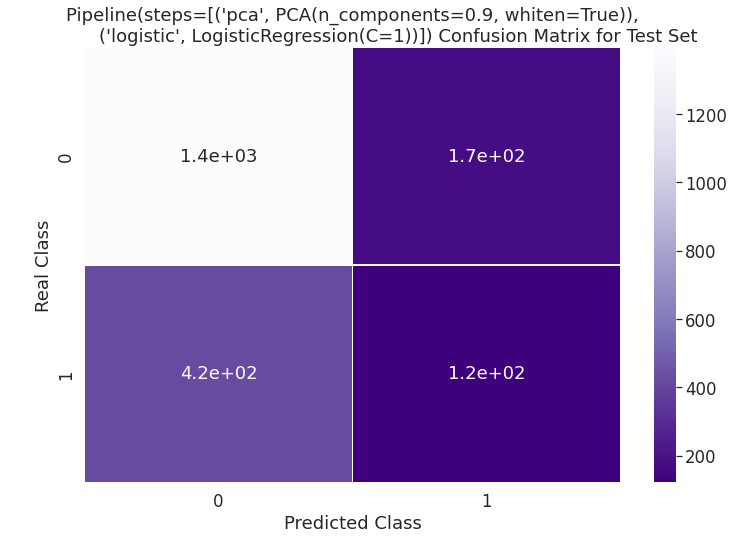

Cross Validation Accuracy Scores: 0.702(+/- 0.27)
Cross Validation Accuracy Scores - Test Set: 0.800(+/- 0.05)


In [ ]:
evaluation_report(pipe_logreg, X_train, Y_train, X_test, Y_test, pred_logreg)

Result: recall decreased

## Ridge with PCA

In [ ]:
pipe_ridge = Pipeline([('pca', pca), ('ridge', ridge)])
pipe_ridge.fit(X_train, Y_train)
pred_ridge = pipe_ridge.predict(X_test)

              precision    recall  f1-score   support

    Churn_No       0.74      1.00      0.85      1568
   Churn_Yes       0.00      0.00      0.00       542

    accuracy                           0.74      2110
   macro avg       0.37      0.50      0.43      2110
weighted avg       0.55      0.74      0.63      2110

[[1568    0]
 [ 542    0]]


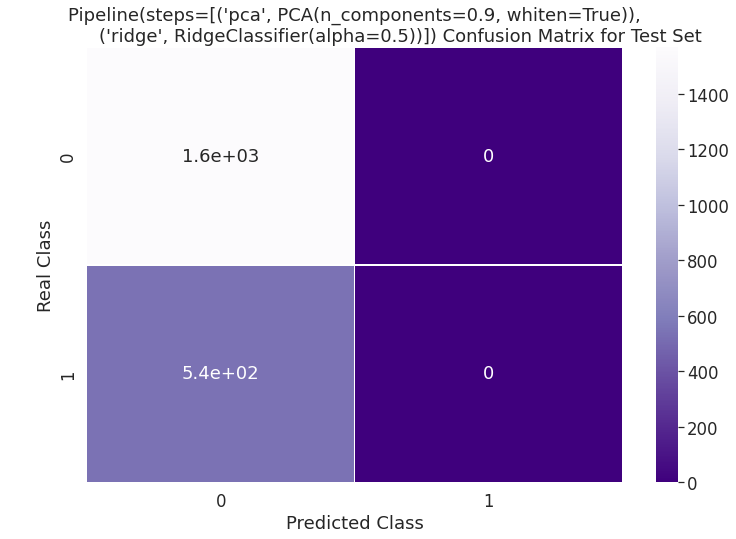

Cross Validation Accuracy Scores: 0.684(+/- 0.27)
Cross Validation Accuracy Scores - Test Set: 0.803(+/- 0.05)


In [ ]:
evaluation_report(pipe_ridge, X_train, Y_train, X_test, Y_test, pred_ridge)

## LASSO with PCA

In [ ]:
pipe_lasso = Pipeline([('pca', pca), ('lasso', lasso_model)])
pipe_lasso.fit(X_train, Y_train)
pred_lasso = pipe_lasso.predict(X_test)

              precision    recall  f1-score   support

    Churn_No       0.81      0.81      0.81      1568
   Churn_Yes       0.45      0.46      0.45       542

    accuracy                           0.72      2110
   macro avg       0.63      0.63      0.63      2110
weighted avg       0.72      0.72      0.72      2110

[[1263  305]
 [ 293  249]]


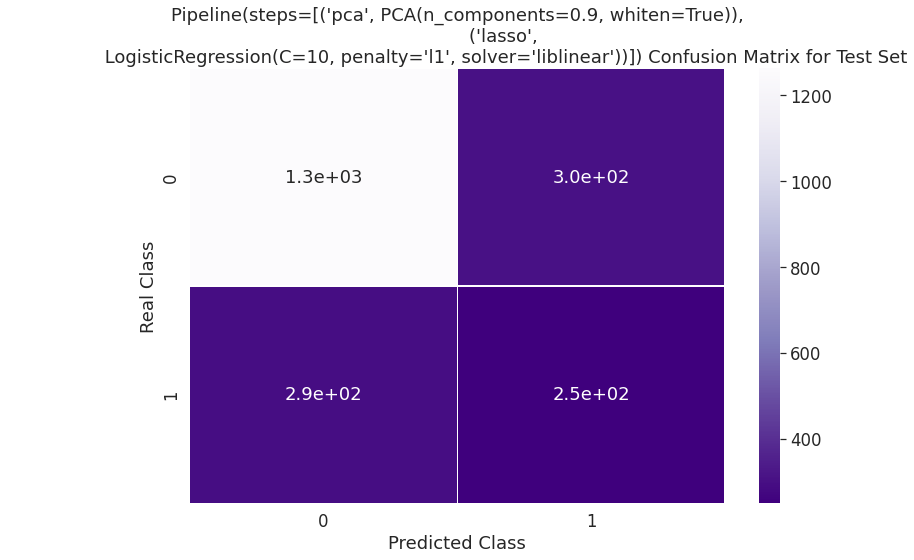

Cross Validation Accuracy Scores: 0.724(+/- 0.19)
Cross Validation Accuracy Scores - Test Set: 0.801(+/- 0.05)


In [ ]:
evaluation_report(pipe_lasso, X_train, Y_train, X_test, Y_test, pred_lasso)

## XG Boost with PCA



In [ ]:
pipe_xgb = Pipeline([('pca', pca), ('gbc', gbc)])
pipe_xgb.fit(X_train, Y_train)
pred_xgb = pipe_xgb.predict(X_test)

              precision    recall  f1-score   support

    Churn_No       0.83      0.84      0.83      1568
   Churn_Yes       0.51      0.49      0.50       542

    accuracy                           0.75      2110
   macro avg       0.67      0.66      0.67      2110
weighted avg       0.75      0.75      0.75      2110

[[1311  257]
 [ 275  267]]


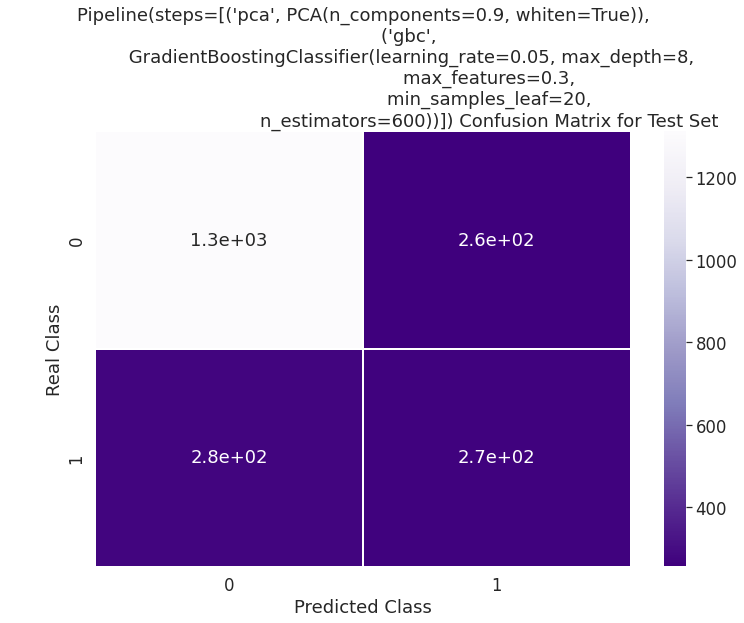

Cross Validation Accuracy Scores: 0.828(+/- 0.18)
Cross Validation Accuracy Scores - Test Set: 0.772(+/- 0.06)


In [ ]:
evaluation_report(pipe_xgb, X_train, Y_train, X_test, Y_test, pred_xgb)

***
# Analyis of Models with PCA

In [ ]:
models = []
models.append(('GBC', ensemble.GradientBoostingClassifier(n_estimators=600, learning_rate=0.05, max_depth=8, max_features=0.3, min_samples_leaf=20)))
models.append(('LR', LogisticRegression(C=1)))
models.append(('Ridge', RidgeClassifier(alpha=0.5)))
models.append(('LASSO', LogisticRegression(penalty = 'l1', C=10, solver='liblinear')))

# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'

# parameters = ["accuracy", "average_precision", "f1", "f1_micro", 'f1_macro', 'f1_weighted', 'precision', "roc_auc"]

for name, model in models:
    kfold = model_selection.KFold(n_splits = 15)
    cv_results = model_selection.cross_val_score(model, X_test, Y_test, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

GBC: 0.798748 (0.042725)
LR: 0.840322 (0.045969)
Ridge: 0.833535 (0.043909)
LASSO: 0.840204 (0.045668)


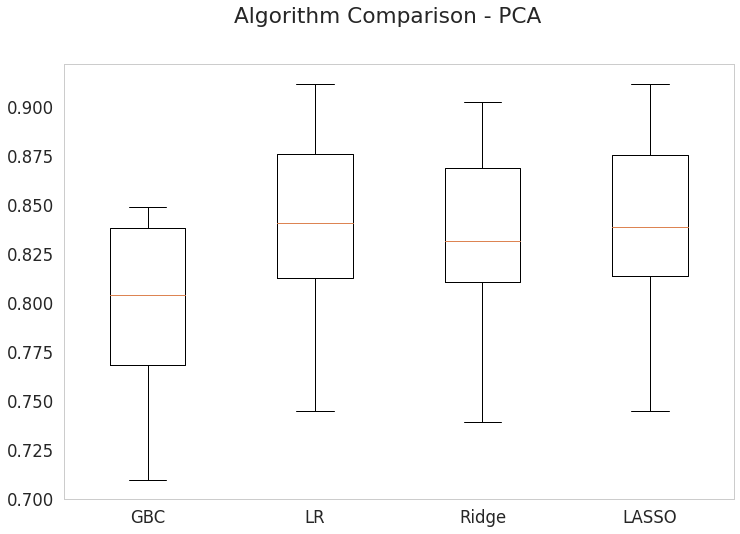

In [ ]:
# boxplot algorithm comparison
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12,8))
fig.suptitle('Algorithm Comparison - PCA')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid(linewidth=1, alpha=0.3, color='white')
#plt.xticks(fontsize=fontsize)
#plt.yticks(fontsize=fontsize)
plt.show()

Overall we can say that PCA did not improve our models. Across almost all the models, the recall in fact dropped subtantially. Seemsd that including all the variable sand that additional information/variation in the data is benefitcial in correctly predicting if a customer will churn.

***
# Including Continuous Variables

In an effort to get slightly better results, we'll try everything one more time with dummy variables that include the continuous data as well as the categories.

In [ ]:
train_set = objects_df.drop(['monthly_bin','tenure_bin'],axis=1)

In [ ]:
train_set = pd.get_dummies(train_set, drop_first=True)

In [ ]:
train_set['MonthlyCharges'] = data['MonthlyCharges']
train_set['tenure'] = data['tenure']
train_set['TotalCharges'] = data['TotalCharges']

In [ ]:
X = train_set.drop('Churn_Yes',axis=1)
Y = train_set['Churn_Yes']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.30, random_state=9)

In [ ]:
print('normal data distribution: {}'.format(Counter(Y_train)))

normal data distribution: Counter({0: 3595, 1: 1327})


In [ ]:
# Balance the data with SMOTE
sm = SMOTE(random_state=12)
X_train, Y_train = sm.fit_resample(X_train, Y_train)

In [ ]:
print("SMOTE data distribution: {}".format(Counter(Y_train)))

SMOTE data distribution: Counter({0: 3595, 1: 3595})


## KNN 

In [ ]:
knn_model = KNeighborsClassifier()

In [ ]:
# Determine the parameter values that should be searched

k_range = list(range(1, 10))
param_grid = dict(n_neighbors=k_range)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)

              precision    recall  f1-score   support

    Churn_No       0.87      0.69      0.77      1568
   Churn_Yes       0.44      0.71      0.55       542

    accuracy                           0.70      2110
   macro avg       0.66      0.70      0.66      2110
weighted avg       0.76      0.70      0.71      2110

[[1081  487]
 [ 155  387]]


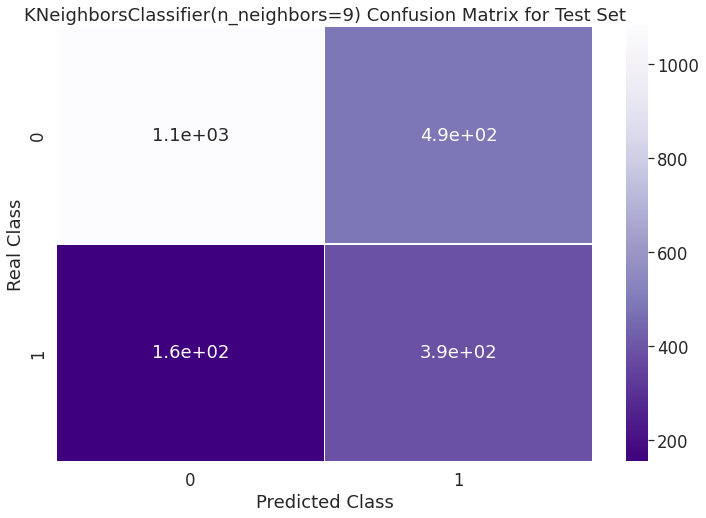

Cross Validation Accuracy Scores: 0.766(+/- 0.04)
Cross Validation Accuracy Scores - Test Set: 0.782(+/- 0.03)


In [ ]:
evaluation_report(knn, X_train, Y_train, X_test, Y_test, Y_pred_knn)

## Logistic Regression

In [ ]:
logmodel = LogisticRegression()

In [ ]:
# Define the parameter values that should be searched
C = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [ ]:
# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(C)
print(param_grid)

{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


In [ ]:
# instantiate and fit the grid
grid = GridSearchCV(logmodel, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='accuracy')

In [ ]:
# Logistic Regression
start = time.time()
grid.fit(X_train, Y_train)
log_reg_prediction = grid.predict(X_test)
log_reg_time = (time.time() - start)
times.append(log_reg_time)
print ("Runtime %0.2f" % log_reg_time)

Runtime 12.01


In [ ]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.8147426981919332
{'C': 1000}


In [ ]:
logmodel = LogisticRegression(C=0.1)
logmodel.fit(X_train, Y_train)
log_reg_pred = logmodel.predict(X_test)

              precision    recall  f1-score   support

    Churn_No       0.88      0.81      0.84      1568
   Churn_Yes       0.55      0.69      0.61       542

    accuracy                           0.78      2110
   macro avg       0.72      0.75      0.73      2110
weighted avg       0.80      0.78      0.78      2110

[[1263  305]
 [ 169  373]]


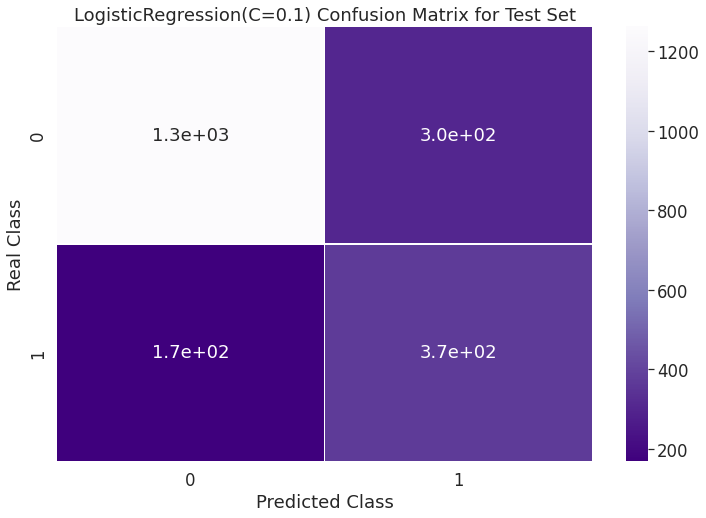

Cross Validation Accuracy Scores: 0.814(+/- 0.13)
Cross Validation Accuracy Scores - Test Set: 0.815(+/- 0.04)


In [ ]:
evaluation_report(logmodel, X_train, Y_train, X_test, Y_test, log_reg_pred)

## Ridge

In [ ]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier()

In [ ]:
# Define the parameter values that should be searched
param_grid = {'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}

In [ ]:
# Ridge Classifier
start = time.time()
grid = GridSearchCV(ridge, param_grid, verbose=1, cv=10, scoring='accuracy')
grid.fit(X_train, Y_train)
Y_pred_ridge = grid.predict(X_test)
ridge_time = time.time() - start
times.append(ridge_time)
print ("Runtime %0.2f" % ridge_time)

Fitting 10 folds for each of 13 candidates, totalling 130 fits
Runtime 2.65


In [ ]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.8165507649513213
{'alpha': 2}


In [ ]:
ridge = RidgeClassifier(alpha=25)
ridge.fit(X_train, Y_train)
Y_pred_ridge = ridge.predict(X_test)

              precision    recall  f1-score   support

    Churn_No       0.89      0.80      0.84      1568
   Churn_Yes       0.55      0.71      0.62       542

    accuracy                           0.77      2110
   macro avg       0.72      0.75      0.73      2110
weighted avg       0.80      0.77      0.78      2110

[[1249  319]
 [ 159  383]]


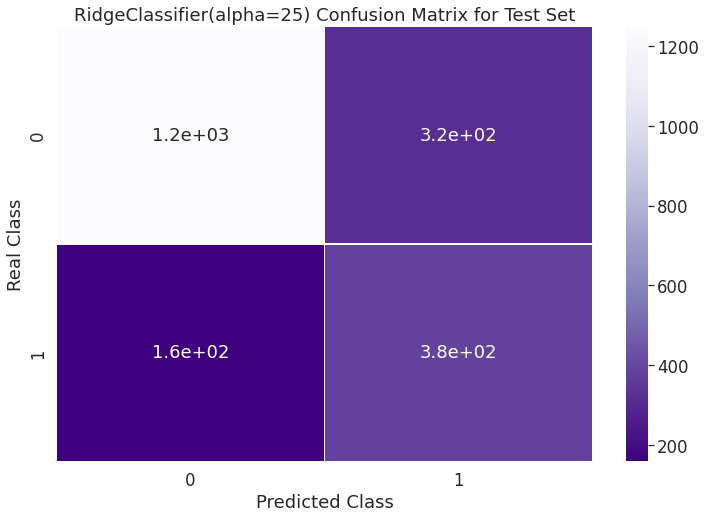

Cross Validation Accuracy Scores: 0.815(+/- 0.11)
Cross Validation Accuracy Scores - Test Set: 0.811(+/- 0.05)


In [ ]:
evaluation_report(ridge, X_train, Y_train, X_test, Y_test, Y_pred_ridge)

## LASSO

In [ ]:
lasso_model = linear_model.LogisticRegression(penalty = 'l1', solver='liblinear')

In [ ]:
# Define the parameter values that should be searched
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [ ]:
# Lasso Classifier
start = time.time()
grid = GridSearchCV(lasso_model, param_grid, verbose=1, cv=10, scoring='accuracy')
grid.fit(X_train, Y_train)
Y_pred_lasso_model = grid.predict(X_test)
time_lasso_cont = time.time() - start
print ("Runtime %0.2f" % time_lasso_cont)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
Runtime 39.12


In [ ]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.8228094575799721
{'C': 10}


In [ ]:
lasso_model = linear_model.LogisticRegression(penalty = 'l1', C=0.1, solver = "liblinear")
lassfit = lasso_model.fit(X_train, Y_train)
Y_pred_lasso_model = lasso_model.predict(X_test)

              precision    recall  f1-score   support

    Churn_No       0.89      0.81      0.85      1568
   Churn_Yes       0.56      0.70      0.62       542

    accuracy                           0.78      2110
   macro avg       0.72      0.75      0.73      2110
weighted avg       0.80      0.78      0.79      2110

[[1272  296]
 [ 165  377]]


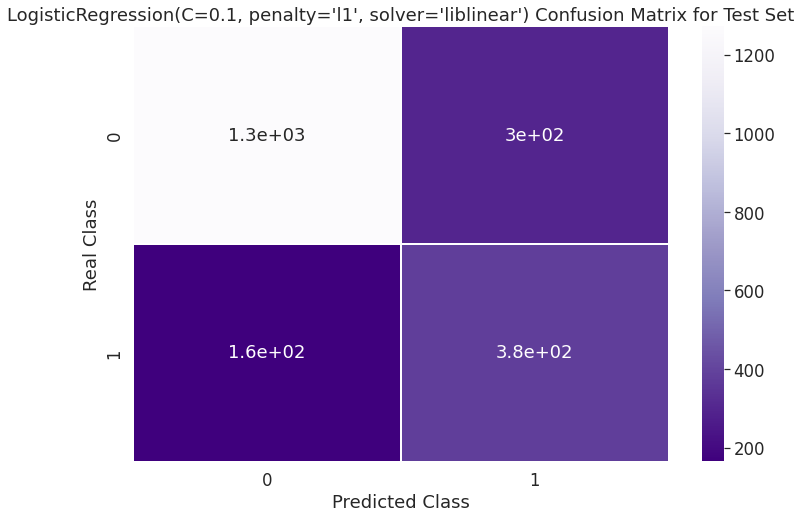

Cross Validation Accuracy Scores: 0.816(+/- 0.12)
Cross Validation Accuracy Scores - Test Set: 0.817(+/- 0.05)


In [ ]:
evaluation_report(lasso_model, X_train, Y_train, X_test, Y_test, Y_pred_lasso_model)

## Decision Tree

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
# Define the parameter values that should be searched
param_grid = {'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2),'criterion' : ['gini', 'entropy']}

In [ ]:
# instantiate and fit the grid
start = time.time()
grid = GridSearchCV(dtc, param_grid, verbose=1, cv=10, scoring='accuracy')
grid.fit(X_train, Y_train)
Y_pred_clf = grid.predict(X_test)
print ("Runtime %0.2f" % (time.time() - start))

Fitting 10 folds for each of 500 candidates, totalling 5000 fits
Runtime 148.42


In [ ]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.8155771905424201
{'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 30}


In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=13, min_samples_split=10)
dtc.fit(X_train, Y_train)
Y_pred_dtc = dtc.predict(X_test)

              precision    recall  f1-score   support

    Churn_No       0.85      0.78      0.81      1568
   Churn_Yes       0.48      0.61      0.54       542

    accuracy                           0.73      2110
   macro avg       0.67      0.69      0.68      2110
weighted avg       0.76      0.73      0.74      2110

[[1219  349]
 [ 214  328]]


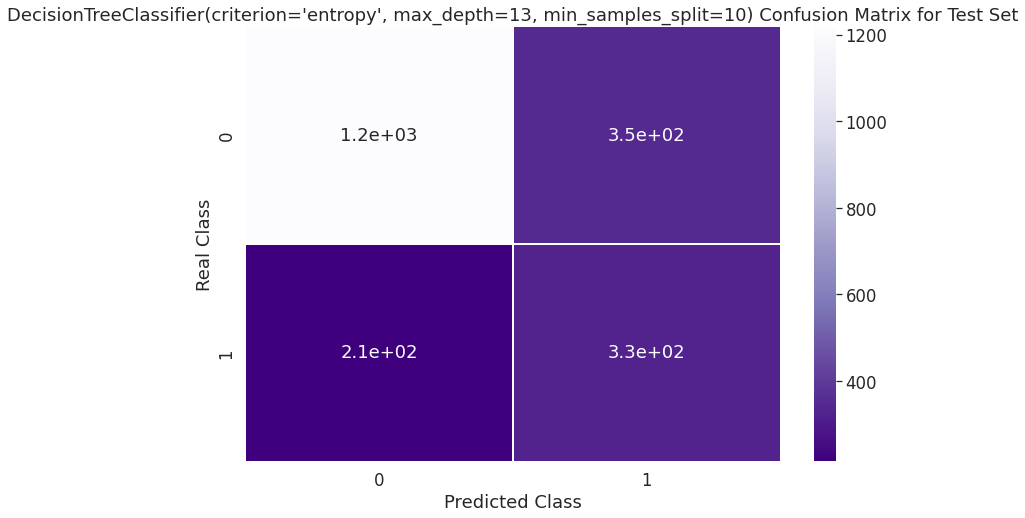

Cross Validation Accuracy Scores: 0.800(+/- 0.14)
Cross Validation Accuracy Scores - Test Set: 0.742(+/- 0.06)


In [ ]:
evaluation_report(dtc, X_train, Y_train, X_test, Y_test, Y_pred_dtc)

## XG Boost

In [ ]:
gbc = ensemble.GradientBoostingClassifier(n_estimators=600) 

In [ ]:
# Define the parameter values that should be searched
param_grid = {'learning_rate': [0.1, 0.05],
              'max_depth': [4, 8],
              'min_samples_leaf': [20, 50],
              'max_features': [1.0, 0.3] 
              }

In [ ]:
# GBC Classifier
start = time.time()
grid = GridSearchCV(gbc, param_grid, verbose=1, cv=10, scoring='accuracy')
grid.fit(X_train, Y_train)
Y_pred_gbc = grid.predict(X_test)
time_gbc = (time.time() - start)
times.append(time_gbc)
print ("Runtime %0.2f" % time_gbc )

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Runtime 1239.62


In [ ]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.8442280945757998
{'learning_rate': 0.05, 'max_depth': 8, 'max_features': 0.3, 'min_samples_leaf': 20}


In [ ]:
gbc = ensemble.GradientBoostingClassifier(n_estimators=600, learning_rate=0.05, max_depth=8, max_features=0.3, min_samples_leaf=20)
gbc.fit(X_train, Y_train)
Y_pred_gbc = gbc.predict(X_test)

In [ ]:
# Accuracy
print(metrics.accuracy_score(Y_test,Y_pred_gbc))

0.7734597156398104


              precision    recall  f1-score   support

    Churn_No       0.84      0.85      0.85      1568
   Churn_Yes       0.56      0.54      0.55       542

    accuracy                           0.77      2110
   macro avg       0.70      0.70      0.70      2110
weighted avg       0.77      0.77      0.77      2110

[[1338  230]
 [ 248  294]]


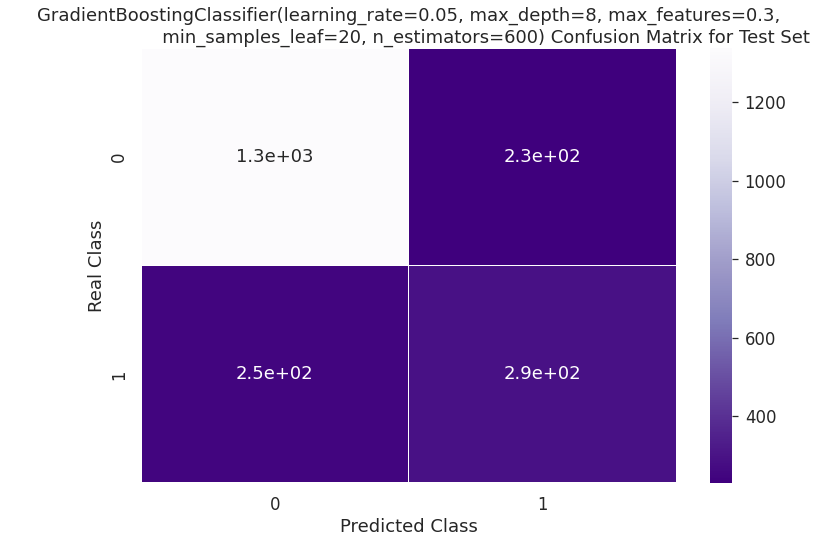

Cross Validation Accuracy Scores: 0.842(+/- 0.17)
Cross Validation Accuracy Scores - Test Set: 0.796(+/- 0.05)


In [ ]:
evaluation_report(gbc, X_train, Y_train, X_test, Y_test, Y_pred_gbc)

***
# Analysis of Models with Continous Data

In [ ]:
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=9)))
models.append(('DTC', DecisionTreeClassifier(criterion='gini', max_depth=13, min_samples_split=10)))
models.append(('RFC', RandomForestClassifier(bootstrap=False, max_depth=None, max_features='auto', min_samples_leaf=1, min_samples_split=2, n_estimators=1)))
models.append(('GBC', ensemble.GradientBoostingClassifier(n_estimators=600, learning_rate=0.05, max_depth=8, max_features=0.3, min_samples_leaf=20)))
models.append(('LR', LogisticRegression(C=0.1)))
models.append(('Ridge', RidgeClassifier(alpha=25) ))
models.append(('LASSO', LogisticRegression(C=0.1, penalty = 'l1', solver='liblinear')))
models.append(('SVC', svm.SVC(kernel = 'rbf', C=10)))

# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'

# parameters = ["accuracy", "average_precision", "f1", "f1_micro", 'f1_macro', 'f1_weighted', 'precision', "roc_auc"]

for name, model in models:
    kfold = model_selection.KFold(n_splits = 15)
    cv_results = model_selection.cross_val_score(model, X_test, Y_test, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.756694 (0.058437)
DTC: 0.710054 (0.048636)
RFC: 0.650541 (0.064859)
GBC: 0.820102 (0.045758)
LR: 0.844386 (0.048560)
Ridge: 0.838159 (0.050855)
LASSO: 0.842128 (0.050148)
SVC: 0.799209 (0.047191)


In [ ]:
cv_results.mean()

0.7992089820605612

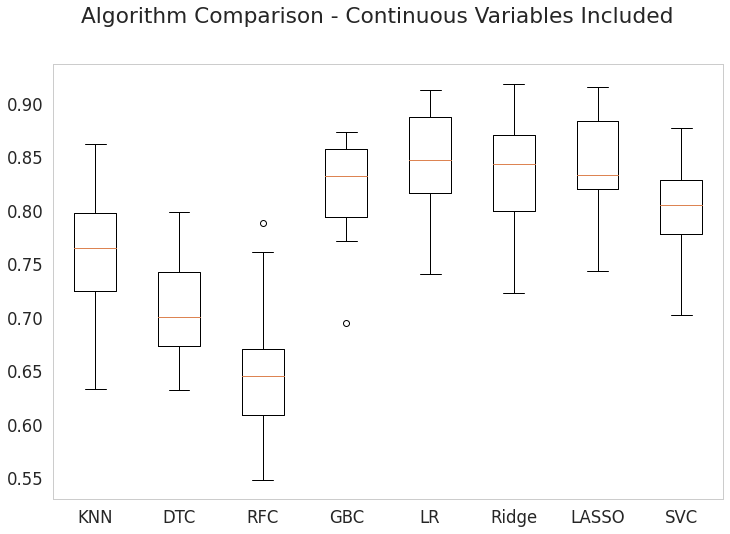

In [ ]:
# boxplot algorithm comparison
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12,8))
fig.suptitle('Algorithm Comparison - Continuous Variables Included')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid(linewidth=1, alpha=0.3, color='white')
#plt.xticks(fontsize=fontsize)
#plt.yticks(fontsize=fontsize)
plt.show()

Including the continous variables seemed to have a marginla benefit in fitting our models and generating predictions on our test set. Most of our models experienced increased accuracy when using the continous data along side the categorical variables. 

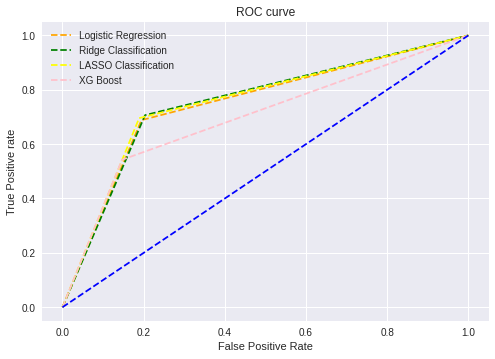

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

plt.style.use('seaborn')

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test, log_reg_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(Y_test, Y_pred_ridge, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(Y_test, Y_pred_lasso_model, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(Y_test, Y_pred_gbc, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Ridge Classification')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='LASSO Classification')
plt.plot(fpr4, tpr4, linestyle='--',color='pink', label='XG Boost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')


# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


***
# Feature Importance 

Using logistic regression, we look at the coefficients of each feature to determine which are the most important when predicting churn.

In [ ]:
features = train_set.drop('Churn_Yes',axis=1).columns

model_final = linear_model.LogisticRegression(C=0.1)
model_final.fit(X_train, Y_train)
model_final.coef_.shape
std = np.std(X_train, 0)
std = np.array(std)
std.shape
coefs = std*model_final.coef_
df_imp = pd.DataFrame(coefs).T
df_imp.columns=["importance"]
df_imp["labels"] = features
df_imp.sort_values("importance", inplace=True, ascending=False)
display(df_imp.head(5))
display(df_imp.tail(5))

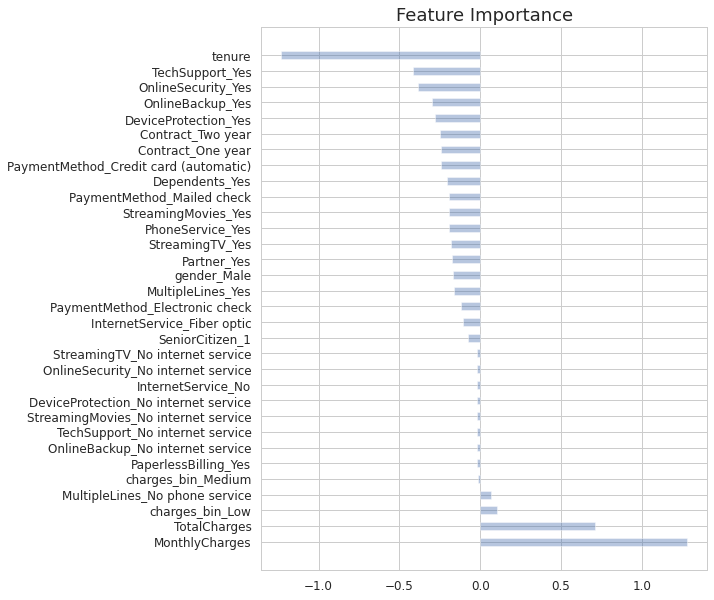

In [ ]:
index = np.arange(len(df_imp))
fig = plt.figure(figsize=(8, 10))
plt.subplot('111')
bar_width = 0.5
plt.xticks(size = 12)
plt.yticks(size = 12)
rects = plt.barh(index, df_imp["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.title('Feature Importance')
plt.yticks(index, df_imp["labels"])

plt.show()

Montly charges, total charges are among most important features. This was picked up on when conducting our exploraty data analysis, hence these findings support this conclusion. 

Tenure, two-year or one-year contract among features most associated with not-churning, as well as online security, backup and device protection. 

***
# Conclusion and Discussion

We tried several different ways of modeling the data, such as:

* Feature engineering the continuous variables into categorical variables, where monthly cost and tenure were put into boxes based on 'low' 'medium' or 'high', the values of which were based on interquartile ranges.
* Modeling the data including the continuous variables
* Modeling the data using PCA and manually selecting features


In these three seperate analyses we tuned for best parameters and reported their results individually an compared them on the test data in each analysis. 

When using continous variables we obtained better simple accuracy scores. using PCA did not help in improving our models, in fact recall was greatly hindered across most models - as such, PCA resulted in models with poorer performance. Models showed overfitting with the training data (PCA models). PCA reduced our data from 33 to 23 features. 

Looking at run times, the XG Boost algorithm took a considerably longer time to fit compared to the other models. We did note a decrease in computational time with PCA data across all models.



## Final Model Discussion

The best-performing models were **high recall** models that used all of the data, including continuous data. Of the models, vanilla logistic regression, LASSO regression, and Ridge had the best results. The best performing ensemble method was XG Boost which had a marginally worse accuracy and AUC ROC score



The final model could predict churn 83% of the time, though it also classified that many non-churners would churn. Our final model was a logisdtic model using a mix of categorical and continous variables. The *classical* statistical method for binary classification could predict churn 83% of the time, though it also classified that many non-churners would churn. This may be of a suprising result, beating a lot of algorithms which have claimed superior classifcation perforamnce. Maybe, less suprising, that the robust XG Boost algorithm appeared to outperform a lot of the other machine learning and ensemble techniques employed. It achieved around 80%, compared to logistic which attained 84%. LASSO and Ridge also performed well across the mutliple analyses. The random forest results were some what interesting, being outperfromed by a single deicision tree algorithm. 


## Further Work

In further work, we acknoweldged that certain demographic charactersitcs like age were not accounted for in the data. Since teleco offerings are becoming more of a utility than a luxury, there's a wide range of demographics. As such, inherent variance in the data could be reduced through market segmentation using customer demographics. Research targeted at the most valuable portion of the market could increase company revenue by providing further insights into why specific demographics churn or stay. 


We note that we used GridSeachCV for several of the models, for hyperparameter tuning. We only varied a few key parameters. Greater research and time spent when modelling can be applied to better fine tune some parameters to achieve better perfroming models. 

While our best model could correctly predict churn 83% of the time, to further improve the model, we would have to apply domain knowledge and market segmentation, and reduce variance in the data via demographic grouping, and gathering data in different areas.




## Important Features

Through our analyses, we were able to establish which features are the most important when trying to determine churn. The most important features are:

* Total Charges
* No Phone Service
* Fiber Optic Internet Service
* Paperless Billing
* Electronic Check Payment Method




## Next Steps

In terms of the company we could propose several steps, hypothetically. It would be of great benefit for the Teleco company to gather more data about the customers they want to keep. Of course, not all churn is bad and not all who churn are missed: customers who are late on payments or who frequently 'service hop' in search of the best deal may not be missed and the company may not care about keeping them. THis could allow for better or improved (more informative) analysis for the future

We also propose that the company should decide on their most valuable portion of the market. A Teleco company might want to look at families with children, since more and more children are getting cellphones and will want internet access, movie and tv streaming, which leads to better profit margins due to 'bundling' and higher monthly prices. 



